# Práctica 1. Aprendizaje Automático

Authors: Carlos Iborra Llopis (100451170), Alejandra Galán Arrospide (100451273) <br>
For additional notes and requirements: https://github.com/carlosiborra/Grupo02-Practica2-AprendizajeAutomatico

❗If you are willing to run the code yourself, please clone the full GitHub repository, as it contains the necessary folder structures to export images and results❗

# 0. Table of contents


---
# 1. Requirements


In [1]:
""" Importing necessary libraries """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as st
import scipy
import sklearn

from matplotlib.cbook import boxplot_stats as bps

### 1.1. Cleaning ../data/img/ folder
This way we avoid creating multiple images and sending the old ones to the trash.<br>
Also using this to upload cleaner commits to GitHub.


In [2]:
""" Cleaning the ../data/img/ folder """
import os
import glob

files = glob.glob("../data/img/*")
for f in files:
    if os.path.isfile(f) and f.endswith(".png"):
        os.remove(f)

---
# 2. Reading the datasets
Reading the datasets from the bz2 files, group 2.

In [3]:
import pickle

with open('./data/attrition_available_2.pkl', 'rb') as pkl_file:
    datos = pickle.load(pkl_file)

datos # TODO: FIX THIS

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,7.315971,13.0,2.0,4.0,3.0,NaN,4.0,31.0,Yes,Travel_Frequently,...,0.0,Y,23.0,NaN,1.0,6.0,3.0,5.0,1.0,4
6,6.450877,17.0,NaN,4.0,1.0,3.0,1.0,28.0,Yes,Travel_Rarely,...,2.0,Y,20.0,8.0,1.0,5.0,2.0,0.0,0.0,0
13,8.871421,14.0,2.0,3.0,1.0,2.0,2.0,NaN,Yes,Non-Travel,...,NaN,Y,NaN,8.0,2.0,10.0,NaN,10.0,9.0,9
28,10.713066,6.0,2.0,3.0,4.0,3.0,1.0,44.0,Yes,Travel_Frequently,...,3.0,Y,NaN,NaN,NaN,19.0,2.0,1.0,0.0,0
30,9.662808,11.0,2.0,3.0,1.0,2.0,3.0,26.0,Yes,Travel_Rarely,...,NaN,Y,11.0,8.0,0.0,5.0,5.0,NaN,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,8.316921,6.0,3.0,3.0,4.0,1.0,NaN,42.0,No,Travel_Rarely,...,3.0,NaN,17.0,8.0,1.0,10.0,5.0,3.0,0.0,2
4406,5.897197,8.0,2.0,3.0,4.0,4.0,3.0,29.0,No,NaN,...,2.0,Y,15.0,8.0,0.0,10.0,NaN,3.0,0.0,2
4407,7.149526,18.0,3.0,4.0,1.0,3.0,3.0,25.0,No,Travel_Rarely,...,0.0,Y,20.0,8.0,0.0,5.0,4.0,NaN,1.0,2
4408,9.187612,8.0,2.0,3.0,4.0,1.0,3.0,42.0,No,Travel_Rarely,...,0.0,Y,14.0,8.0,1.0,10.0,NaN,NaN,NaN,8


In [4]:
# Export the data to a csv file
datos.to_csv('./data/attrition_available_2.csv', index=False)

---
# 3. EDA

<mark>(0,15 puntos) Hacer un EDA muy simplificado: cuántas instancias / cuantos 
atributos y de qué tipo (numéricos, ordinales, categóricos); columnas constantes o 
innecesarias; que proporción de missing values por atributo; tipo de problema: 
(clasificación o regresión); ¿es desbalanceado?</mark>

**Key Concepts of Exploratory Data Analysis**

- **2 types of Data Analysis**
  - Confirmatory Data Analysis
  - Exploratory Data Analysis
- **4 Objectives of EDA**
  - Discover Patterns
  - Spot Anomalies
  - Frame Hypothesis
  - Check Assumptions
- **2 methods for exploration**
  - Univariate Analysis
  - Bivariate Analysis
- **Stuff done during EDA**
  - Trends
  - Distribution
  - Mean
  - Median
  - Outlier
  - Spread measurement (SD)
  - Correlations
  - Hypothesis testing
  - Visual Exploration


## 3.0. Dataset preparation

To conduct exploratory data analysis (EDA) on our real data, we need to prepare the data first. Therefore, we have decided to separate the data into training and test sets at an early stage to avoid data leakage, which could result in an overly optimistic evaluation of the model, among other consequences. This separation will be done by dividing the data prematurely into training and test sets since potential data leakage can occur from the usage of the test partition, especially when including the result variable.

It is important to note that this step is necessary because all the information obtained in this section will be used to make decisions such as dimensionality reduction. Furthermore, this approach makes the evaluation more realistic and rigorous since the test set is not used until the end of the process.

### 3.0.1. Stratified K-Fold
To ensure a fair and unbiased evaluation of our model's performance, we will be using stratified k-fold for dividing our data into training and test sets. Stratified k-fold is a commonly used technique in machine learning that ensures that the distribution of classes in the training and test sets is similar, thus reducing the risk of introducing bias into our model's performance evaluation.

By using stratified k-fold, we can ensure that each fold of the data used for training and testing our model contains a representative sample of all the classes in the dataset. This helps to account for any potential class imbalance in the data, ensuring that our model is trained and tested on a diverse set of data, leading to a more reliable evaluation of its performance.

Note: as we are second group, we will be using 2 as our random state seed.

<mark>Simplemente dividiremos los datos en un conjunto de train para entrenar y ajustar hiper-parámetros, y un conjunto de test en el que evaluaremos las distintas posibilidades 
que se probarán en la práctica. Hay que recordar que En problemas de clasificación 
desbalanceados hay que usar particiones estratificadas y métricas adecuadas 
(balanced_accuracy, f1, matriz de confusión). También es conveniente que los 
métodos de construcción de modelos traten el desbalanceo, usando por ejemplo 
el parámetro class_weight=”balanced”</mark>

In [5]:
# Import the necessary libraries
from sklearn.model_selection import StratifiedKFold

In [6]:
""" Train Test Split using Stratified K-Fold """

# Make a copy of the data (we will re-split the data later to ensure that the data is not contaminated)
datos_copy = datos.copy()

# Define the number of folds for stratified k-fold
n_splits = 5

# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate over the stratified k-fold splits
for train_index, test_index in stratified_kfold.split(datos_copy, datos_copy['Attrition']):
    # Split the data into training and test sets using the current split indices
    train_set = datos_copy.iloc[train_index]
    test_set = datos_copy.iloc[test_index]
    
    # Extract the features (X) and target (y) from the training and test sets
    X_train = train_set.drop('Attrition', axis=1)  # Drop the 'Attrition' column to get the features
    y_train = train_set['Attrition']  # Extract the 'Attrition' column as the target
    
    X_test = test_set.drop('Attrition', axis=1)  # Drop the 'Attrition' column to get the features
    y_test = test_set['Attrition']  # Extract the 'Attrition' column as the target
 

Check the train-test division correctness

In [7]:
# Show the head of X_train, y_train, X_test, y_test
print("--------------------\n")
print(f"{X_train.head()}", f"{y_train.head()}", f"{X_test.head()}", f"{y_test.head()}", sep="\n--------------------\n")
print("--------------------\n")

print(f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}")

# Check is division summatory is correct
if X_train.shape[0] + X_test.shape[0] == datos_copy.shape[0]:
    print(
        f"\nThe train test division is correct: {X_train.shape[0]} + {X_test.shape[0]} = {datos_copy.shape[0]}"
    )
else:
    print("\nERROR: The train test division is incorrect")


--------------------

          hrs  absences  JobInvolvement  PerformanceRating  \
1    7.315971      13.0             2.0                4.0   
6    6.450877      17.0             NaN                4.0   
13   8.871421      14.0             2.0                3.0   
28  10.713066       6.0             2.0                3.0   
30   9.662808      11.0             2.0                3.0   

    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance   Age  \
1                       3.0              NaN              4.0  31.0   
6                       1.0              3.0              1.0  28.0   
13                      1.0              2.0              2.0   NaN   
28                      4.0              3.0              1.0  44.0   
30                      1.0              2.0              3.0  26.0   

       BusinessTravel              Department  ...  NumCompaniesWorked  \
1   Travel_Frequently  Research & Development  ...                 0.0   
6       Travel_Rarely  Researc

In [9]:
# Check the train-test division correctness by comparing the class distribution in the original dataset and the train and test sets.
print("\n--------------------\n")
print("Original dataset class distribution:\n", datos_copy['Attrition'].value_counts(normalize=True))
print("\n--------------------\n")
print("Train set class distribution:\n", y_train.value_counts(normalize=True))
print("\n--------------------\n")
print("Test set class distribution:\n", y_test.value_counts(normalize=True))
print("\n--------------------\n")


--------------------

Original dataset class distribution:
 No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

--------------------

Train set class distribution:
 No     0.838719
Yes    0.161281
Name: Attrition, dtype: float64

--------------------

Test set class distribution:
 No     0.839002
Yes    0.160998
Name: Attrition, dtype: float64

--------------------



In [8]:
# We divide the data into string and number columns
X_train_str = X_train.select_dtypes(include=object)
X_train_num = X_train.select_dtypes(exclude=object)
print(X_train_str.head())
print(X_train_num.head())

       BusinessTravel              Department EducationField  Gender  \
1   Travel_Frequently  Research & Development  Life Sciences  Female   
6       Travel_Rarely  Research & Development        Medical     NaN   
13         Non-Travel  Research & Development        Medical    Male   
28  Travel_Frequently  Research & Development        Medical    Male   
30      Travel_Rarely  Research & Development        Medical    Male   

               JobRole MaritalStatus Over18  
1   Research Scientist        Single      Y  
6      Sales Executive           NaN      Y  
13  Research Scientist       Married      Y  
28  Research Scientist      Divorced      Y  
30  Research Scientist      Divorced      Y  
          hrs  absences  JobInvolvement  PerformanceRating  \
1    7.315971      13.0             2.0                4.0   
6    6.450877      17.0             NaN                4.0   
13   8.871421      14.0             2.0                3.0   
28  10.713066       6.0             2.0    

As we can observe, the class distribution is almost perfectly preserved in both the training and test sets and that the sum of the number of rows in train and test give us the total amount of rows in the raw dataset. This is due to the fact that the stratified k-fold algorithm does not guarantee that the class distribution is exactly the same in each fold, but rather that it is similar.

Also, we can notice how the distribution of the classes is very similar in both the training and test sets, which is a good sign.

## 3.1. Dataset and problem description

The dataset we are given contains the following atributes information:

0. **hrs**: The number of hours worked by the employee (float64)
1. **absences**: The number of absences taken by the employee (float64)
2. **JobInvolvement**: The level of involvement the employee has in their job (float64)
3. **PerformanceRating**: The employee's performance rating (float64)
4. **EnvironmentSatisfaction**: The level of satisfaction the employee has with their work environment (float64)
5. **JobSatisfaction**: The level of satisfaction the employee has with their job (float64)
6. **WorkLifeBalance**: The balance between work and personal life for the employee (float64)
7. **Age**: The age of the employee (float64)
8. **Attrition**: Whether the employee has left the company or not (object) -> **Target variable**
9. **BusinessTravel**: The frequency of the employee's business travel (object)
10. **Department**: The department the employee works in (object)
11. **DistanceFromHome**: The distance from the employee's home to their workplace (float64)
12. **Education**: The highest level of education attained by the employee (int64)
13. **EducationField**: The field of study the employee specialized in (object)
14. **EmployeeCount**: The number of employees in the company (float64)
15. **EmployeeID**: A unique identifier for each employee (int64)
16. **Gender**: The gender of the employee (object)
17. **JobLevel**: The employee's job level in the company hierarchy (float64)
18. **JobRole**: The specific role the employee has in their department (object)
19. **MaritalStatus**: The employee's marital status (object)
20. **MonthlyIncome**: The employee's monthly income (float64)
21. **NumCompaniesWorked**: The number of companies the employee has worked for before joining the current company (float64)
22. **Over18**: Whether the employee is over 18 years old (presumably all employees are) (object)
23. **PercentSalaryHike**: The percentage of salary increase the employee received in their last salary hike (float64)
24. **StandardHours**: The standard number of working hours in the company (float64)
25. **StockOptionLevel**: The level of stock option the employee has (float64)
26. **TotalWorkingYears**: The total number of years the employee has worked (float64)
28. **TrainingTimesLastYear**: The number of times the employee received training in the last year (float64)
29. **YearsAtCompany**: The number of years the employee has been with the company (float64)
30. **YearsSinceLastPromotion**: The number of years since the employee's last promotion (float64)
31. **YearsWithCurrManager**: The number of years the employee has been with their current manager (float64)

**Note**: the values in between parenthesis correspond to the value type of each column in the dataset.

In [10]:
num_atributos  = len(datos.keys())
print("Se poseen", num_atributos, "atributos.")
num_instances = len(datos)
print("Se poseen", num_instances, "instancias.")

Se poseen 31 atributos.
Se poseen 4410 instancias.


In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 1 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2917 non-null   float64
 1   absences                 2860 non-null   float64
 2   JobInvolvement           2888 non-null   float64
 3   PerformanceRating        2834 non-null   float64
 4   EnvironmentSatisfaction  2757 non-null   float64
 5   JobSatisfaction          2914 non-null   float64
 6   WorkLifeBalance          2891 non-null   float64
 7   Age                      2892 non-null   float64
 8   Attrition                3528 non-null   object 
 9   BusinessTravel           2929 non-null   object 
 10  Department               2861 non-null   object 
 11  DistanceFromHome         2975 non-null   float64
 12  Education                2904 non-null   float64
 13  EducationField           3528 non-null   object 
 14  EmployeeCount           

### 3.1.1. Dataset visualization

<ipython-input-12-3e5e506b4f78>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_set.hist(ax=ax)


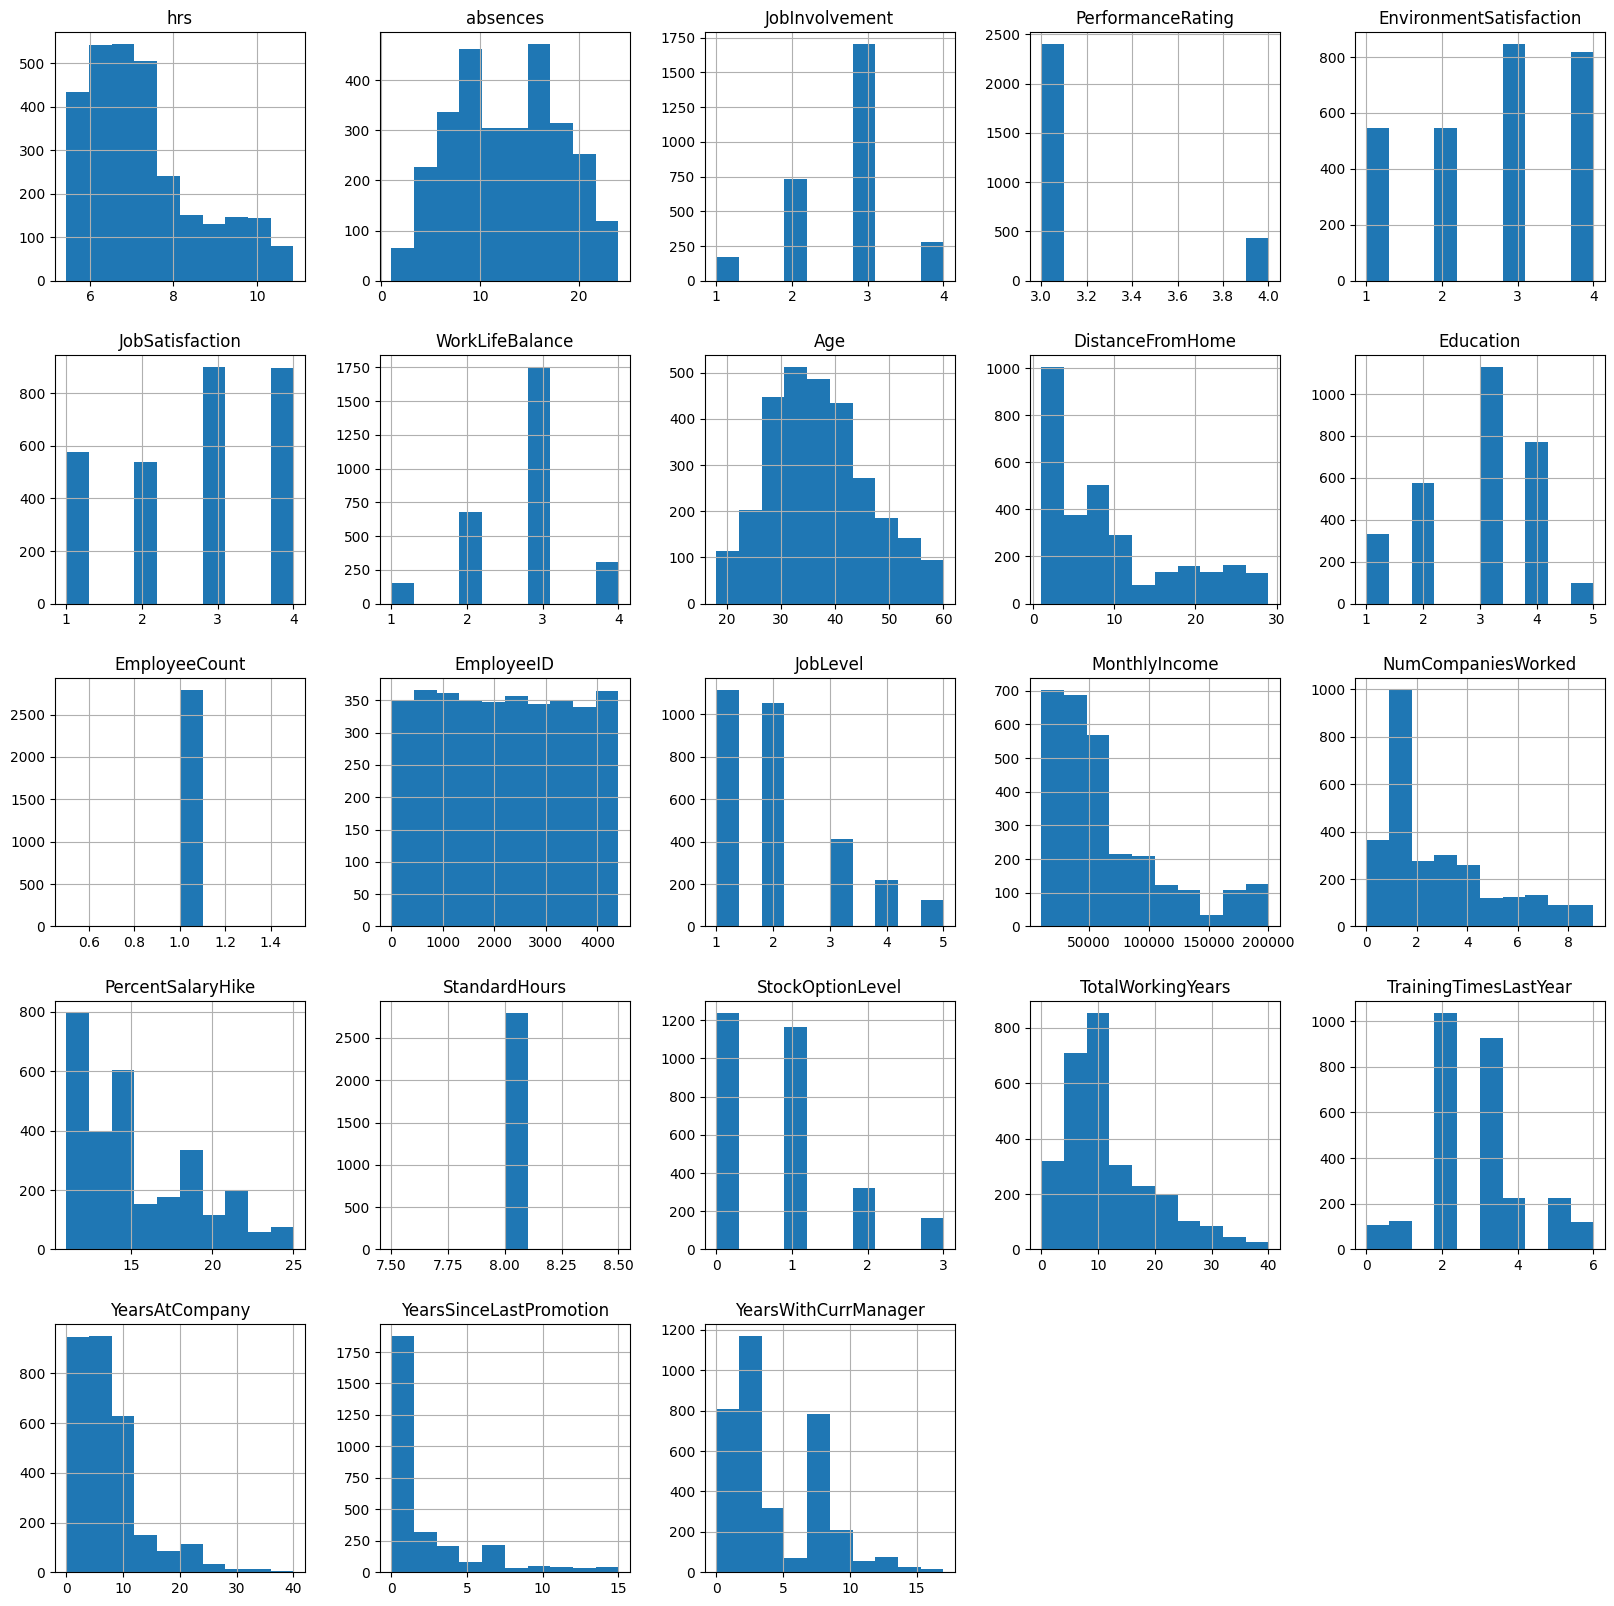

In [12]:
""" Histogram for visualization of the numerical variables """
fig, ax = plt.subplots(figsize=(20, 20))
train_set.hist(ax=ax)
plt.show()

Thanks to this visualization we can note several things. 

1. **Emproyee ID** appears to have the same amount of each number in its range. This is very logical taking into account that this attribute is an identifier. This attribute will be eliminated in the future. 

2. **Standard Hours** seems to have a unique value, 8. This attribute will need further analysis in order to consider its droping. 

3. As Standard Hours, **Employee Count** seems to have a unique value, 1. This attribute will also need further analysis. 

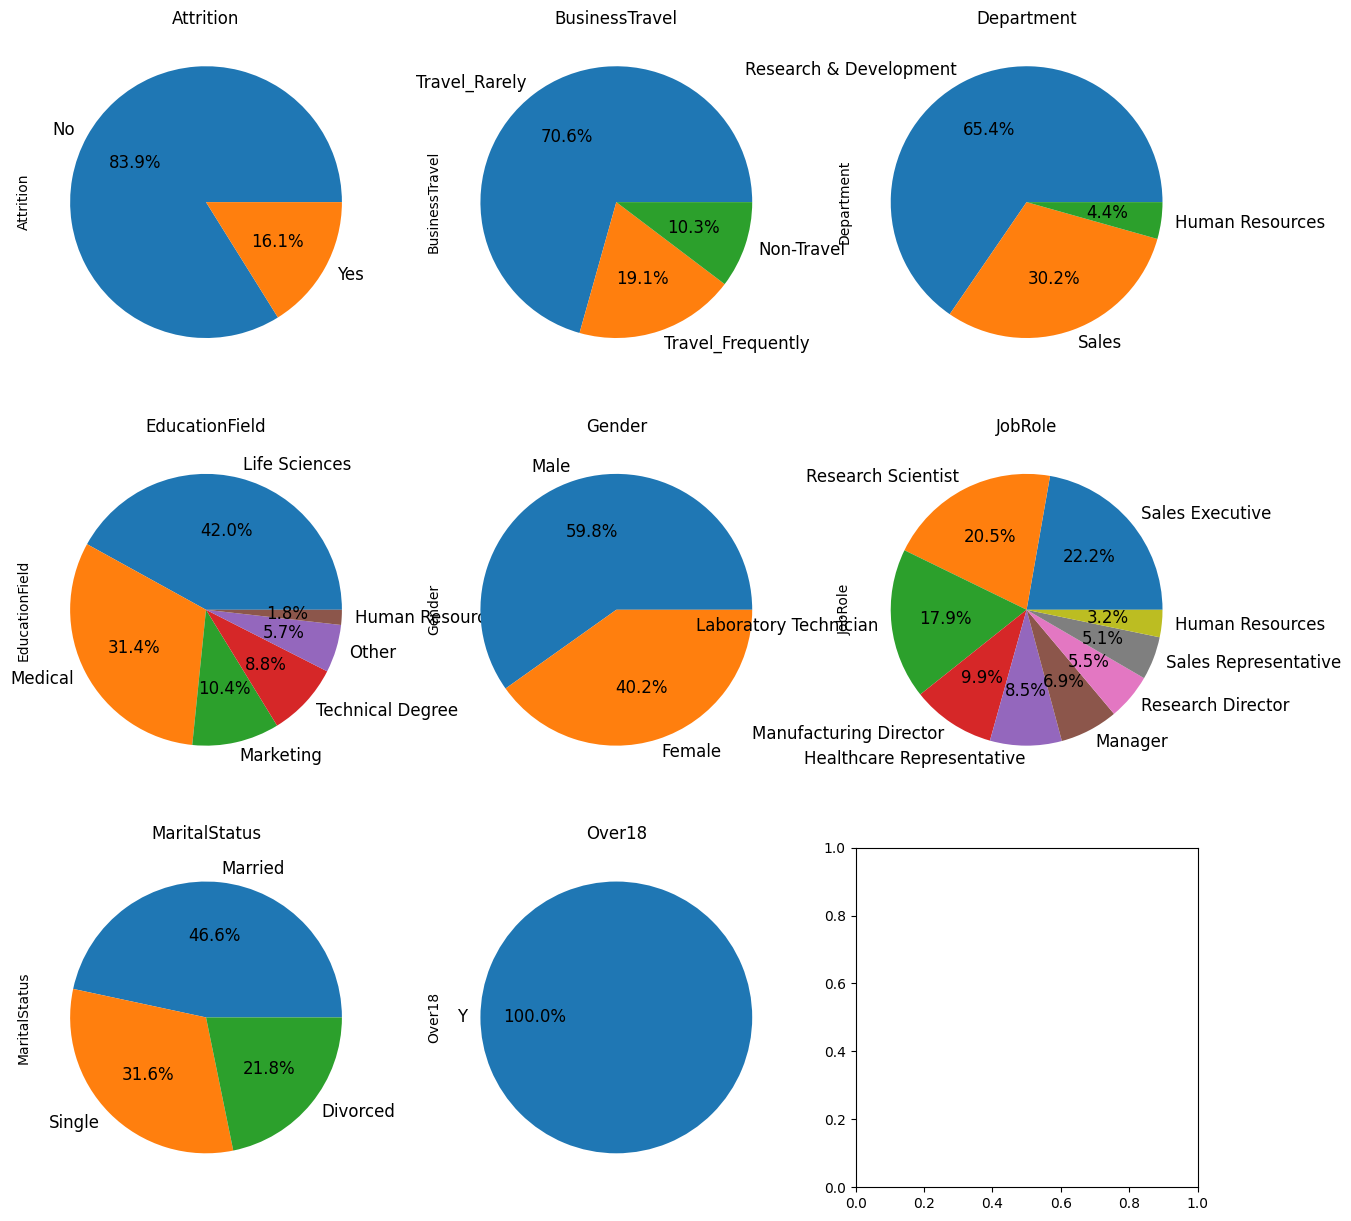

In [22]:
""" Pie series to plot and visualize for categorical variables """
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, col in enumerate(train_set.select_dtypes(include='object')):
    train_set[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%1.1f%%', fontsize=12, title=col)
plt.show()

As in the previous section, thanks to the visualization we can an important fact.
The attribute **Over18** has a constant value, so it adds no value to the analysis. It would be droped in further sections. 

## 3.2. Missing values

Fist, we check the number the total number of missing values in the dataset in order to know if we have to clean the dataset or not.

We use the train_set partition (and not X_train nor y_train) as it contains both the target variable and the rest of the features.

In [27]:
print(train_set.isna().sum())

hrs                        611
absences                   668
JobInvolvement             640
PerformanceRating          694
EnvironmentSatisfaction    771
JobSatisfaction            614
WorkLifeBalance            637
Age                        636
Attrition                    0
BusinessTravel             599
Department                 667
DistanceFromHome           553
Education                  624
EducationField               0
EmployeeCount              738
EmployeeID                   0
Gender                     712
JobLevel                   602
JobRole                    632
MaritalStatus              618
MonthlyIncome              650
NumCompaniesWorked         771
Over18                     687
PercentSalaryHike          612
StandardHours              731
StockOptionLevel           640
TotalWorkingYears          658
TrainingTimesLastYear      770
YearsAtCompany             588
YearsSinceLastPromotion    619
YearsWithCurrManager         0
dtype: int64


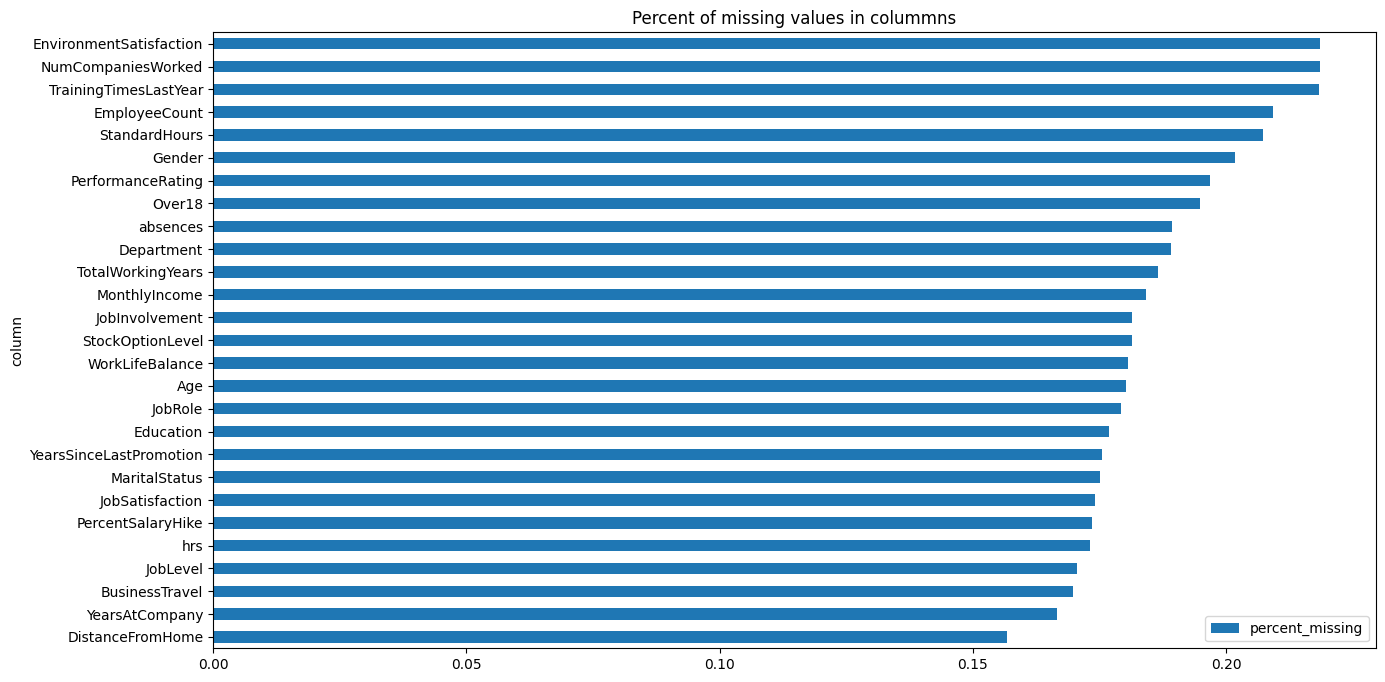

In [28]:
""" Plot in a barplot the percentage of missing values in each column """
import pylab

data = [(col, train_set[col].isnull().sum() / len(train_set))
        for col in train_set.columns if train_set[col].isnull().sum() > 0]
col_names = ['column', 'percent_missing']
missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
pylab.rcParams['figure.figsize'] = (15, 8)
missing_df.plot(kind='barh', x='column', y='percent_missing');
plt.title('Percent of missing values in colummns');

### 3.2.1. Missing values visualization

<Axes: >

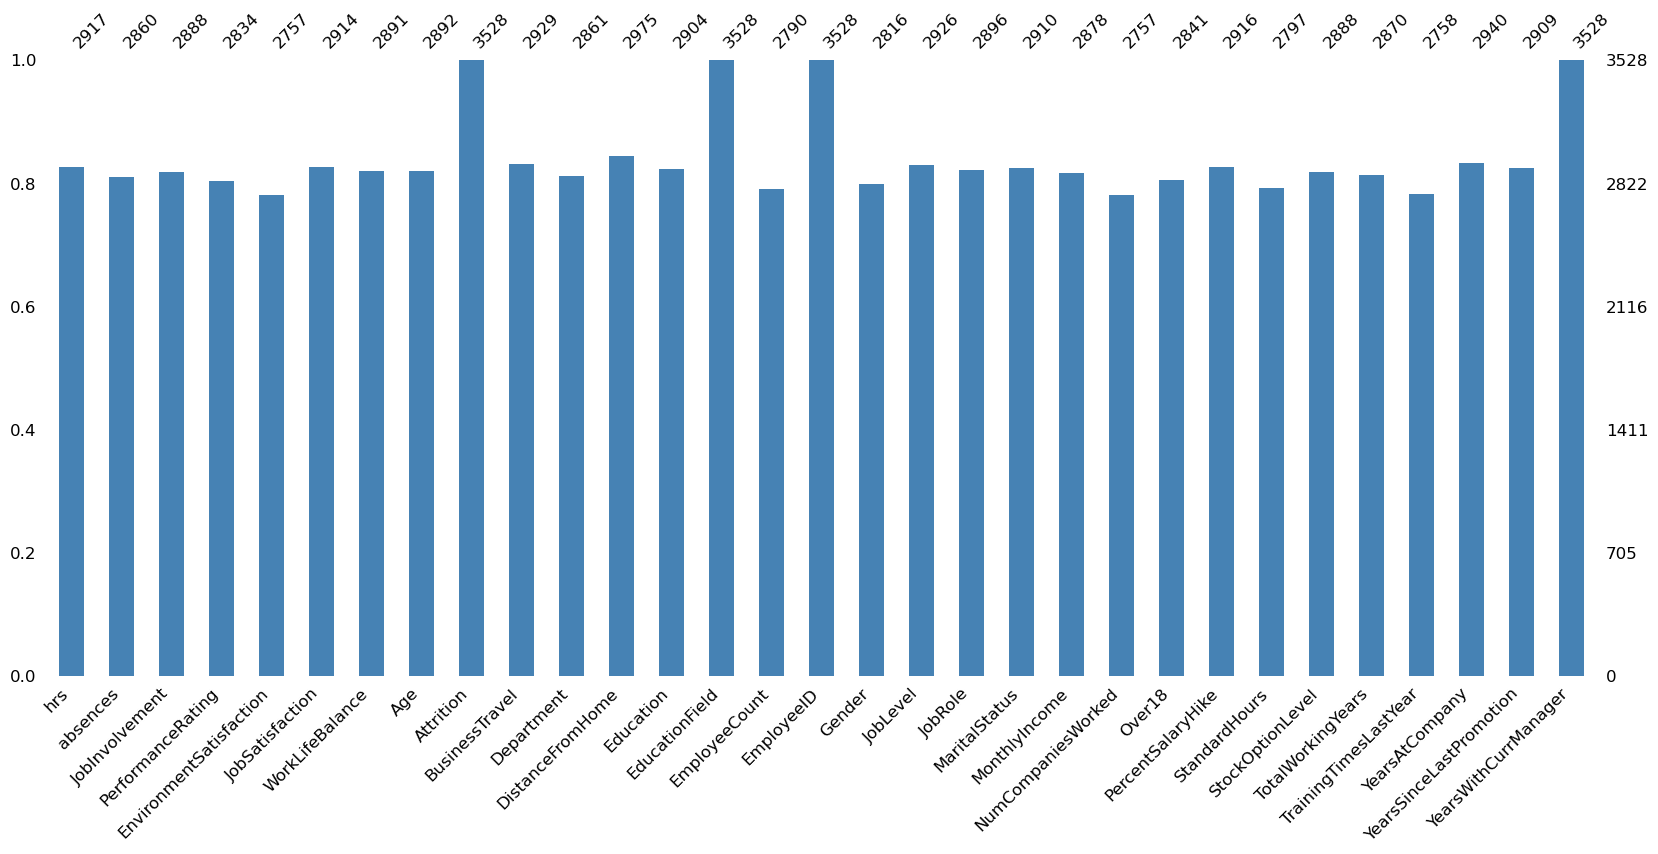

In [ ]:
""" Missing values bar plot """
msno.bar(train_set, figsize=(20, 8), fontsize=12, color='steelblue', labels=True)

<Axes: >

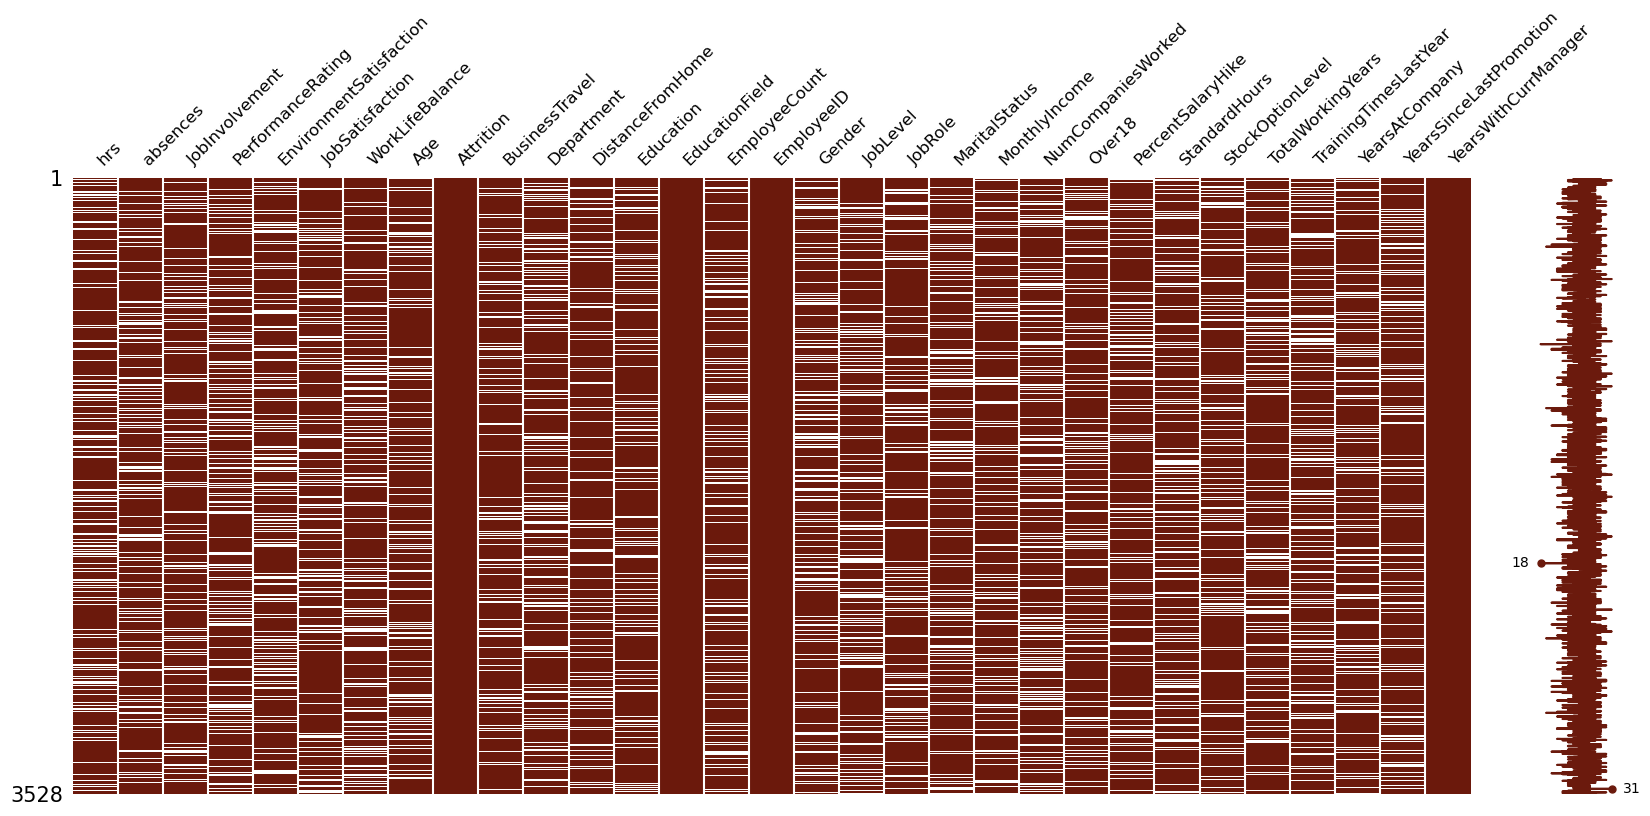

In [ ]:
""" Missing values matrix """
msno.matrix(train_set, figsize=(20, 8), fontsize=12, color=(0.42, 0.1, 0.05))

<Axes: >

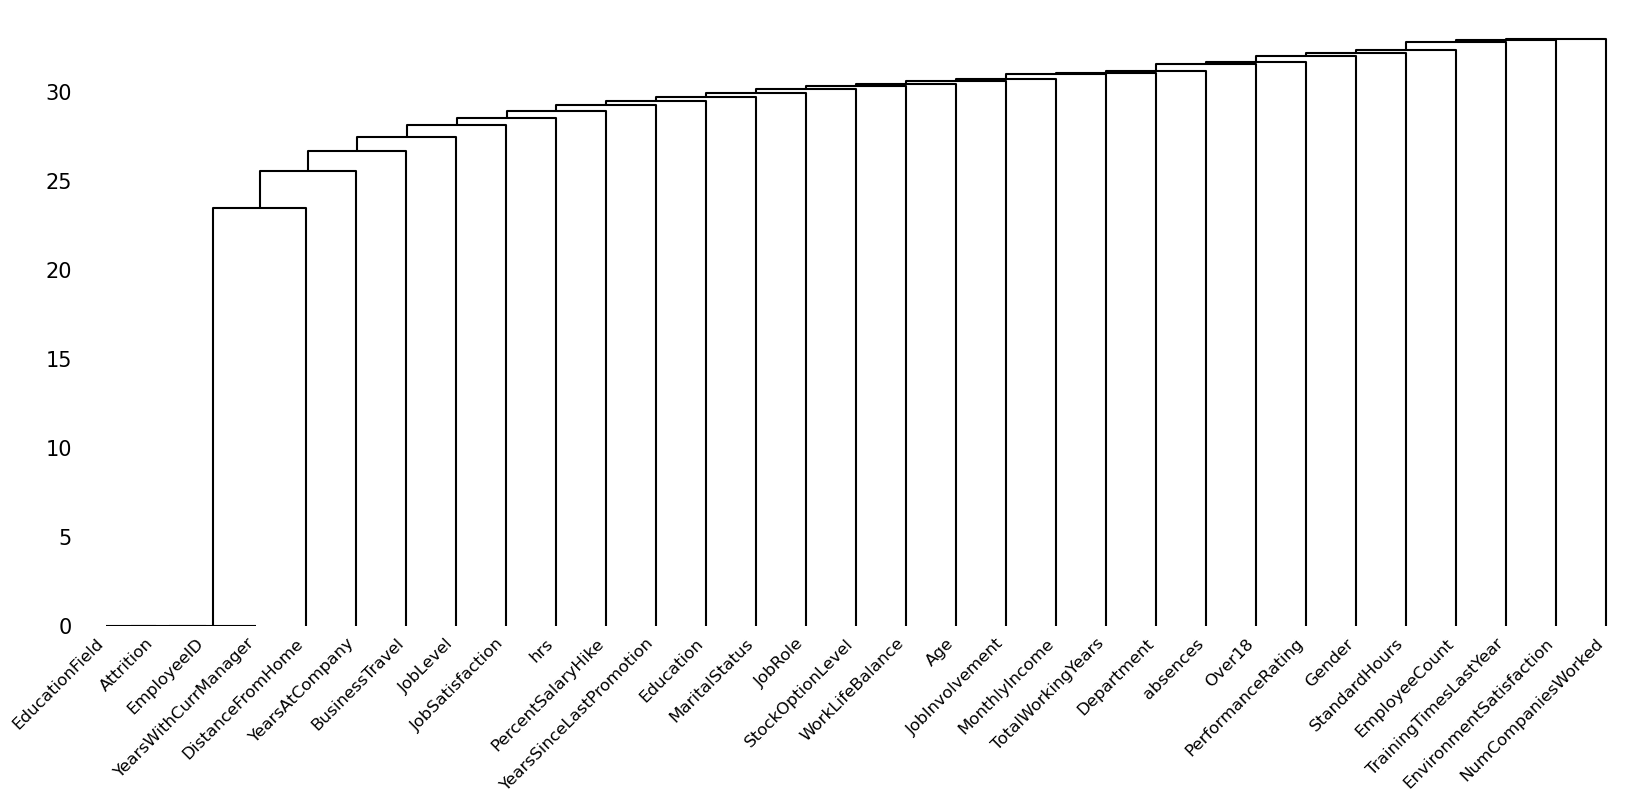

In [ ]:
""" Missing values dendrogram """
msno.dendrogram(train_set, figsize=(20, 8), fontsize=12, orientation='top')

### 3.2.2. Observations and conclusion

- Many variables have a significant number of missing values, ranging from 588 to over 771 missing values, which means that having 4410 rows in the dataset, we have a significant number of missing values ranging from 13.3% to 17.5% of the total number of rows in the dataset, which is significant.
  
  These variables include: 'hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', and 'YearsSinceLastPromotion'.

- Some variables have no missing values, such as 'Attrition' (as it is the target variable), 'EducationField', and 'YearsWithCurrManager'.

It's important to note that missing values can have an impact on the quality and reliability of the data and may require appropriate handling techniques, such as imputation or deletion, depending on the specific analysis or modeling objectives.

Note that none of the attributes have a missing rate high enought for them to be eliminated because of it. Its possible to use imputation to solve this problem. 

## 3.3. Outliers


Detecting outliers in a dataset before training a model is crucial because outliers can significantly affect the performance and accuracy of the model. Outliers are data points that deviate significantly from the rest of the dataset and can cause the model to learn incorrect patterns and relationships. When outliers are present in the data, they can also increase the variance of the model, which can result in overfitting. Overfitting occurs when the model fits too closely to the training data, leading to poor generalization to new data. Therefore, it is important to detect and handle outliers properly to ensure the model's accuracy and robustness.

**NOTE:** outliers are only useful when the attributes are not categorical, as they are not useful for classification problems. Therefore, only the numerical attributes will be considered in this section.

### 3.3.1. Outliers visualization

### 3.3.1.1. Boxplot

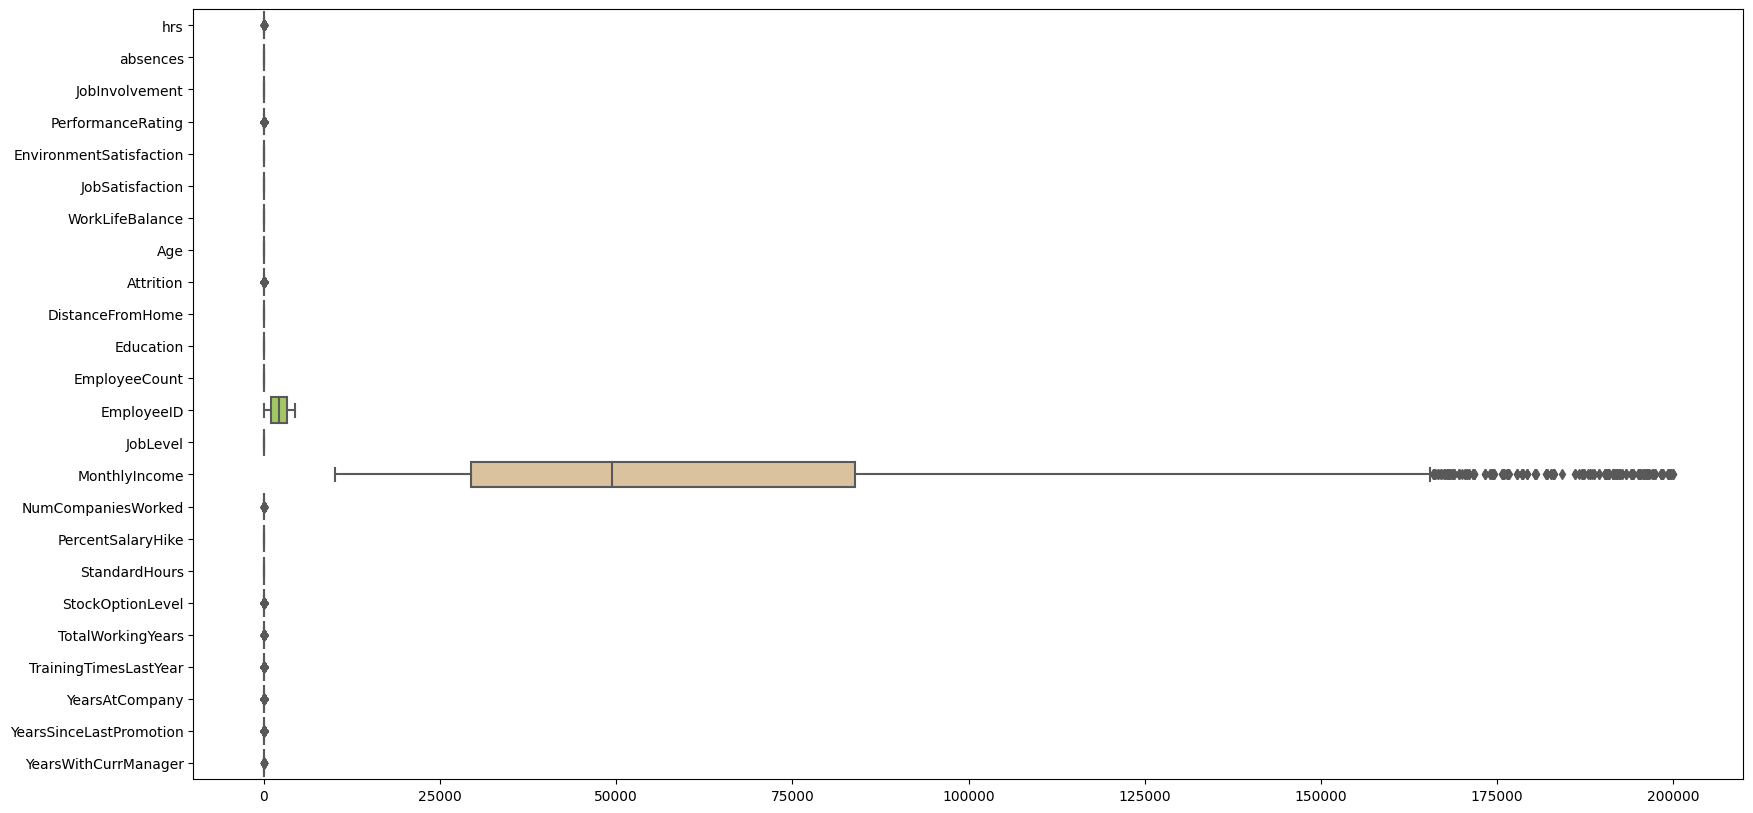

In [29]:
""" Box plot to detect outliers """
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=train_set, orient='h', palette='Set2') # ,showfliers=False
plt.show()

#### 3.3.1.2. Histogram

<ipython-input-30-23f5a0a230f4>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_set.hist(ax=ax)


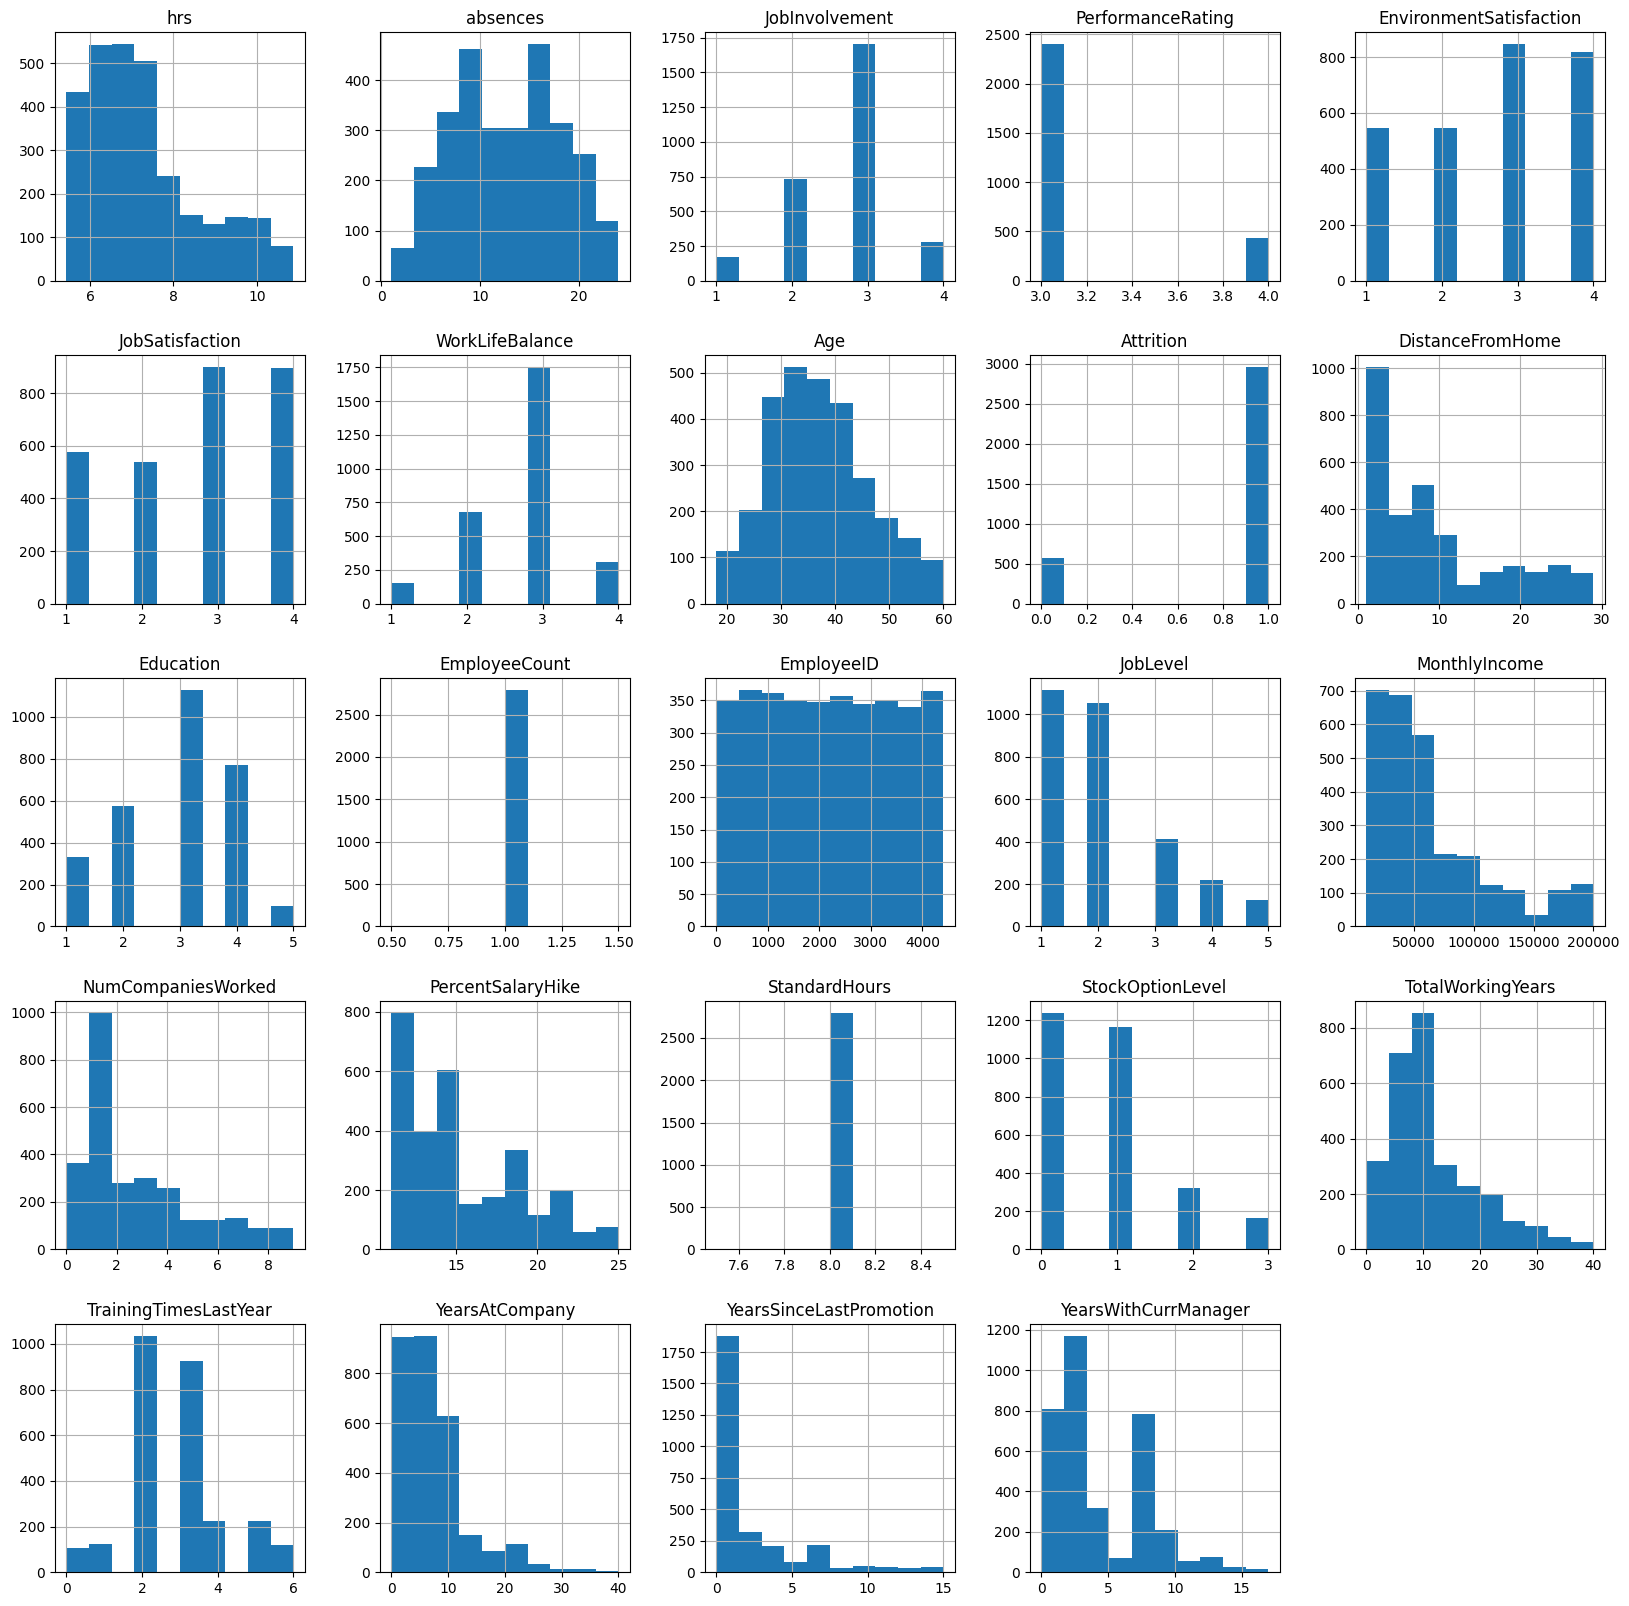

In [30]:
""" Histograms to detect outliers """
fig, ax = plt.subplots(figsize=(20, 20))
train_set.hist(ax=ax)
plt.show()

#### 3.3.1.3. Skewness and kurtosis
Skewness and kurtosis are commonly used to measure the shape of a distribution. Skewness measures the degree of asymmetry in the distribution, while kurtosis measures the degree of flatness in the distribution compared to a normal distribution.
We will look for observations that are far from the central tendency of the distribution and may indicate the presence of extreme values or data points that do not fit the pattern of the majority of the data (which as expected, happens to be the case in this dataset).

Skewness: measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [31]:
""" Skewness """
train_set.skew().sort_values(ascending=False)

<ipython-input-31-4ca9b40dc3a6>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.skew().sort_values(ascending=False)


YearsSinceLastPromotion    2.010269
PerformanceRating          1.934941
YearsAtCompany             1.711169
MonthlyIncome              1.352524
TotalWorkingYears          1.139681
NumCompaniesWorked         1.058816
JobLevel                   1.043887
StockOptionLevel           0.951557
DistanceFromHome           0.939869
hrs                        0.880414
YearsWithCurrManager       0.805330
PercentSalaryHike          0.801963
TrainingTimesLastYear      0.547272
Age                        0.394624
EmployeeID                 0.015735
absences                   0.006601
EmployeeCount              0.000000
StandardHours              0.000000
Education                 -0.263638
EnvironmentSatisfaction   -0.297571
JobSatisfaction           -0.336527
JobInvolvement            -0.512700
WorkLifeBalance           -0.539936
Attrition                 -1.842697
dtype: float64

/tmp/ipykernel_30839/3111858986.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(train_set.skew(), color="blue", axlabel="Skewness")
/tmp/ipykernel_30839/3111858986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_set.skew(), color="blue", axlabel="Skewness")


<Axes: xlabel='Skewness', ylabel='Density'>

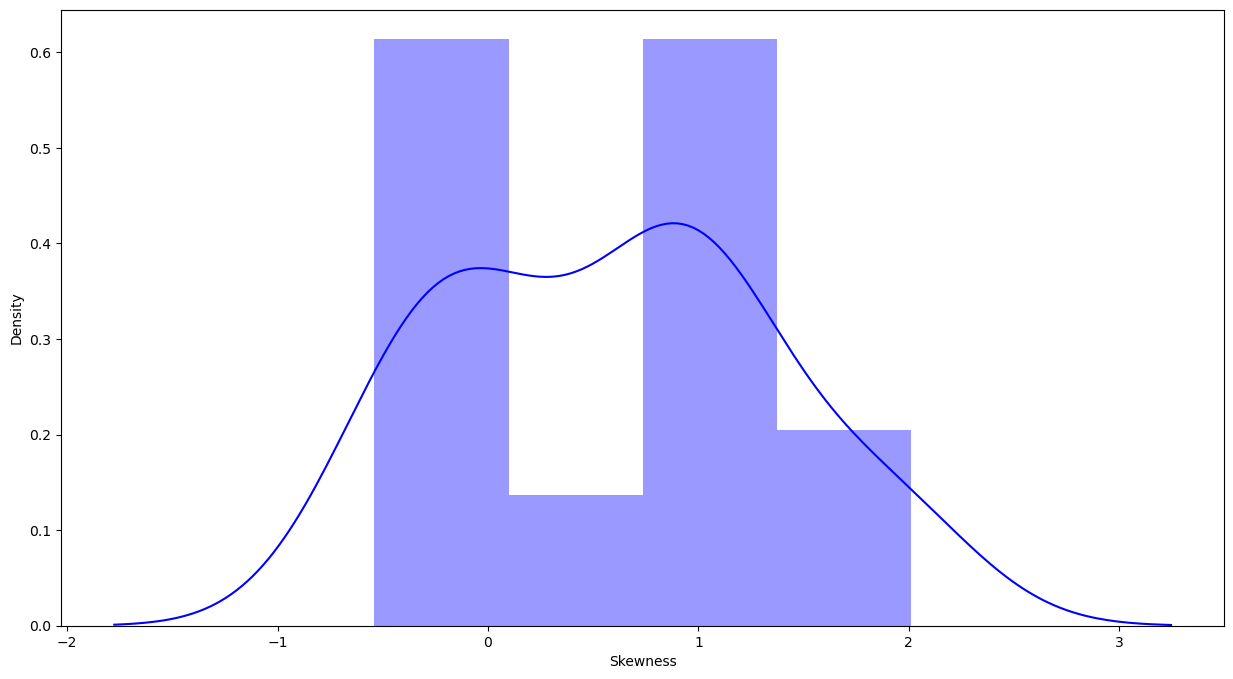

In [ ]:
sns.distplot(train_set.skew(), color="blue", axlabel="Skewness")

Kurtosis: measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

In [ ]:
""" Kurtosis """
train_set.kurt().sort_values(ascending=False)

/tmp/ipykernel_30839/2541372112.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.kurt().sort_values(ascending=False)


YearsSinceLastPromotion    3.751488
YearsAtCompany             3.688171
PerformanceRating          1.745229
MonthlyIncome              0.960551
TotalWorkingYears          0.959773
TrainingTimesLastYear      0.525953
JobLevel                   0.428930
WorkLifeBalance            0.410453
StockOptionLevel           0.317629
JobInvolvement             0.260644
NumCompaniesWorked         0.112778
YearsWithCurrManager       0.082264
EmployeeCount              0.000000
StandardHours              0.000000
hrs                       -0.119057
DistanceFromHome          -0.280372
PercentSalaryHike         -0.315038
Age                       -0.426820
Education                 -0.561514
absences                  -1.087776
EmployeeID                -1.210737
JobSatisfaction           -1.210908
EnvironmentSatisfaction   -1.222330
dtype: float64

/tmp/ipykernel_30839/1401715678.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(train_set.kurt(), color="r", axlabel="Kurtosis", norm_hist=False, kde=True, rug=False)
/tmp/ipykernel_30839/1401715678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_set.kurt(), color="r", axlabel="Kurtosis", norm_hist=False, kde=True, rug=False)


<Axes: xlabel='Kurtosis', ylabel='Density'>

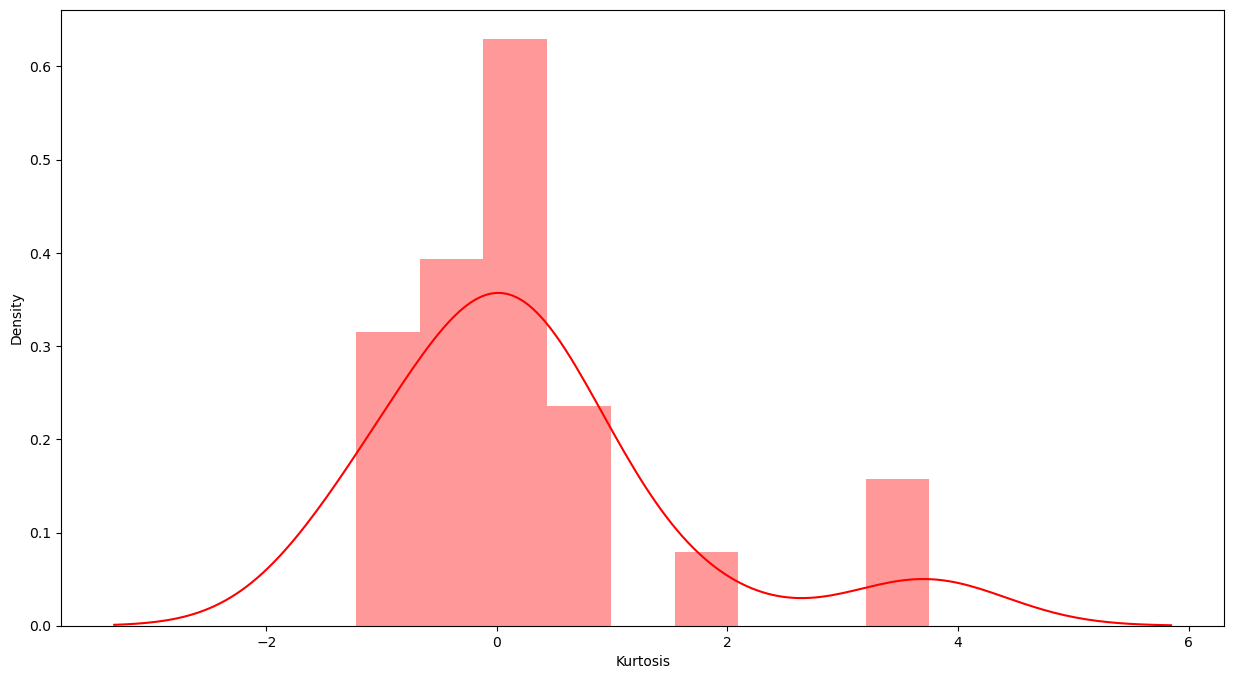

In [ ]:
sns.distplot(train_set.kurt(), color="r", axlabel="Kurtosis", norm_hist=False, kde=True, rug=False)

### **Importance of outliers on our models**

**Logistic regression** aims to fit a linear boundary that separates the two classes in the dataset. When outliers are present, they can shift this boundary and lead to incorrect predictions. Additionally, outliers can affect the estimation of the regression coefficients and standard errors, leading to biased parameter estimates and incorrect hypothesis tests.

**Boosting** algorithms are sensitive to outliers in the training data, as they aim to fit the data as closely as possible. Outliers can have a significant impact on the model's performance and can lead to overfitting.

In boosting, each subsequent model in the sequence aims to correct the errors made by the previous model, focusing on the misclassified samples. Outliers are usually given high weights in the subsequent models to improve their performance on these samples. This can result in overfitting and poor generalization on new, unseen data.

## 3.4. Correlation


In this section we are getting information about the correlation of the variables between them. This information is valuable in order to make good decisions when deleting redundant attributes. Also note we are getting information about the correlation between each attribute and the solution variable. This allows us to know the most relevant attributes, making the best decisions when creating the different models.  

In [24]:
""" Correlation """
correlation = abs(train_set.corr())
print(correlation.shape)


(23, 23)


<ipython-input-24-d79afd2ed8c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = abs(train_set.corr())


In [25]:
""" Correlation for both numerical and categorical variables - target variable"""
# Correlation with the target variable
from pandas import factorize

labels, uniques = factorize(train_set['Attrition'])
train_set['Attrition'] = labels
abs(train_set.corr()['Attrition']).sort_values(ascending=False)


<ipython-input-25-b5152c10f4e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Attrition'] = labels
<ipython-input-25-b5152c10f4e3>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(train_set.corr()['Attrition']).sort_values(ascending=False)


Attrition                  1.000000
hrs                        0.204852
TotalWorkingYears          0.177977
Age                        0.155051
YearsWithCurrManager       0.153782
YearsAtCompany             0.146039
EnvironmentSatisfaction    0.101747
JobSatisfaction            0.085973
WorkLifeBalance            0.067923
MonthlyIncome              0.052015
PerformanceRating          0.048025
TrainingTimesLastYear      0.046375
NumCompaniesWorked         0.037692
absences                   0.037366
PercentSalaryHike          0.036140
YearsSinceLastPromotion    0.035057
Education                  0.030518
DistanceFromHome           0.023400
JobInvolvement             0.022363
StockOptionLevel           0.015006
JobLevel                   0.014565
EmployeeID                 0.004094
EmployeeCount                   NaN
StandardHours                   NaN
Name: Attrition, dtype: float64

### Obtaining the correlation matrix formatted into our own data structure
This is done for the sake of simplicity and to be able to visualize the correlation matrix in a more intuitive way.

In [26]:
correlation_dict = {}

# Export the data as a list of lists
list_correlation = correlation.values.tolist()


# Now lets insert the each list as the value of a dictionary with the column name as the key
for i, col in enumerate(correlation.columns):
    correlation_dict[col] = list_correlation[i]
    
# Plotting the dictionary column by column sepparated by \n
print( "\n\n".join("{}\t{}".format(k, v) for k, v in correlation_dict.items()) )

hrs	[1.0, 0.3382801614907361, 0.02150077225478339, 0.0677092690734899, 0.06878631695881544, 0.023695993716213313, 0.0364939933708315, 0.01697440487152799, 0.01912038124440154, 0.004195997141429942, nan, 0.018593188648375007, 0.03766119775538184, 0.019900716399642512, 0.0015811873878898266, 0.04870744151178925, nan, 0.005767344986870257, 0.01787848160733644, 0.011821376984818614, 0.03218262788903572, 0.018600133889235097, 0.04043453608707017]

absences	[0.3382801614907361, 1.0, 0.020204221800225627, 0.011375632891339464, 0.030724898802436708, 0.008029107179785102, 0.006849885635805943, 0.042100423033403514, 0.006157731375583047, 0.011867149249862841, nan, 0.004013755266107708, 0.005491643736161303, 0.012568728115220392, 0.02072814925254903, 0.02158914535373753, nan, 0.03233334080043543, 0.01101906337594318, 0.0005254839099658097, 0.008403327592370238, 0.0033275974659393217, 0.013389121510546094]

JobInvolvement	[0.02150077225478339, 0.020204221800225627, 1.0, 0.0046934253282899996, 0.01

### 3.4.1. Correlation visualization

#### 3.4.1.1. Correlation heatmap

<Axes: title={'center': 'Correlation Heatmap'}>

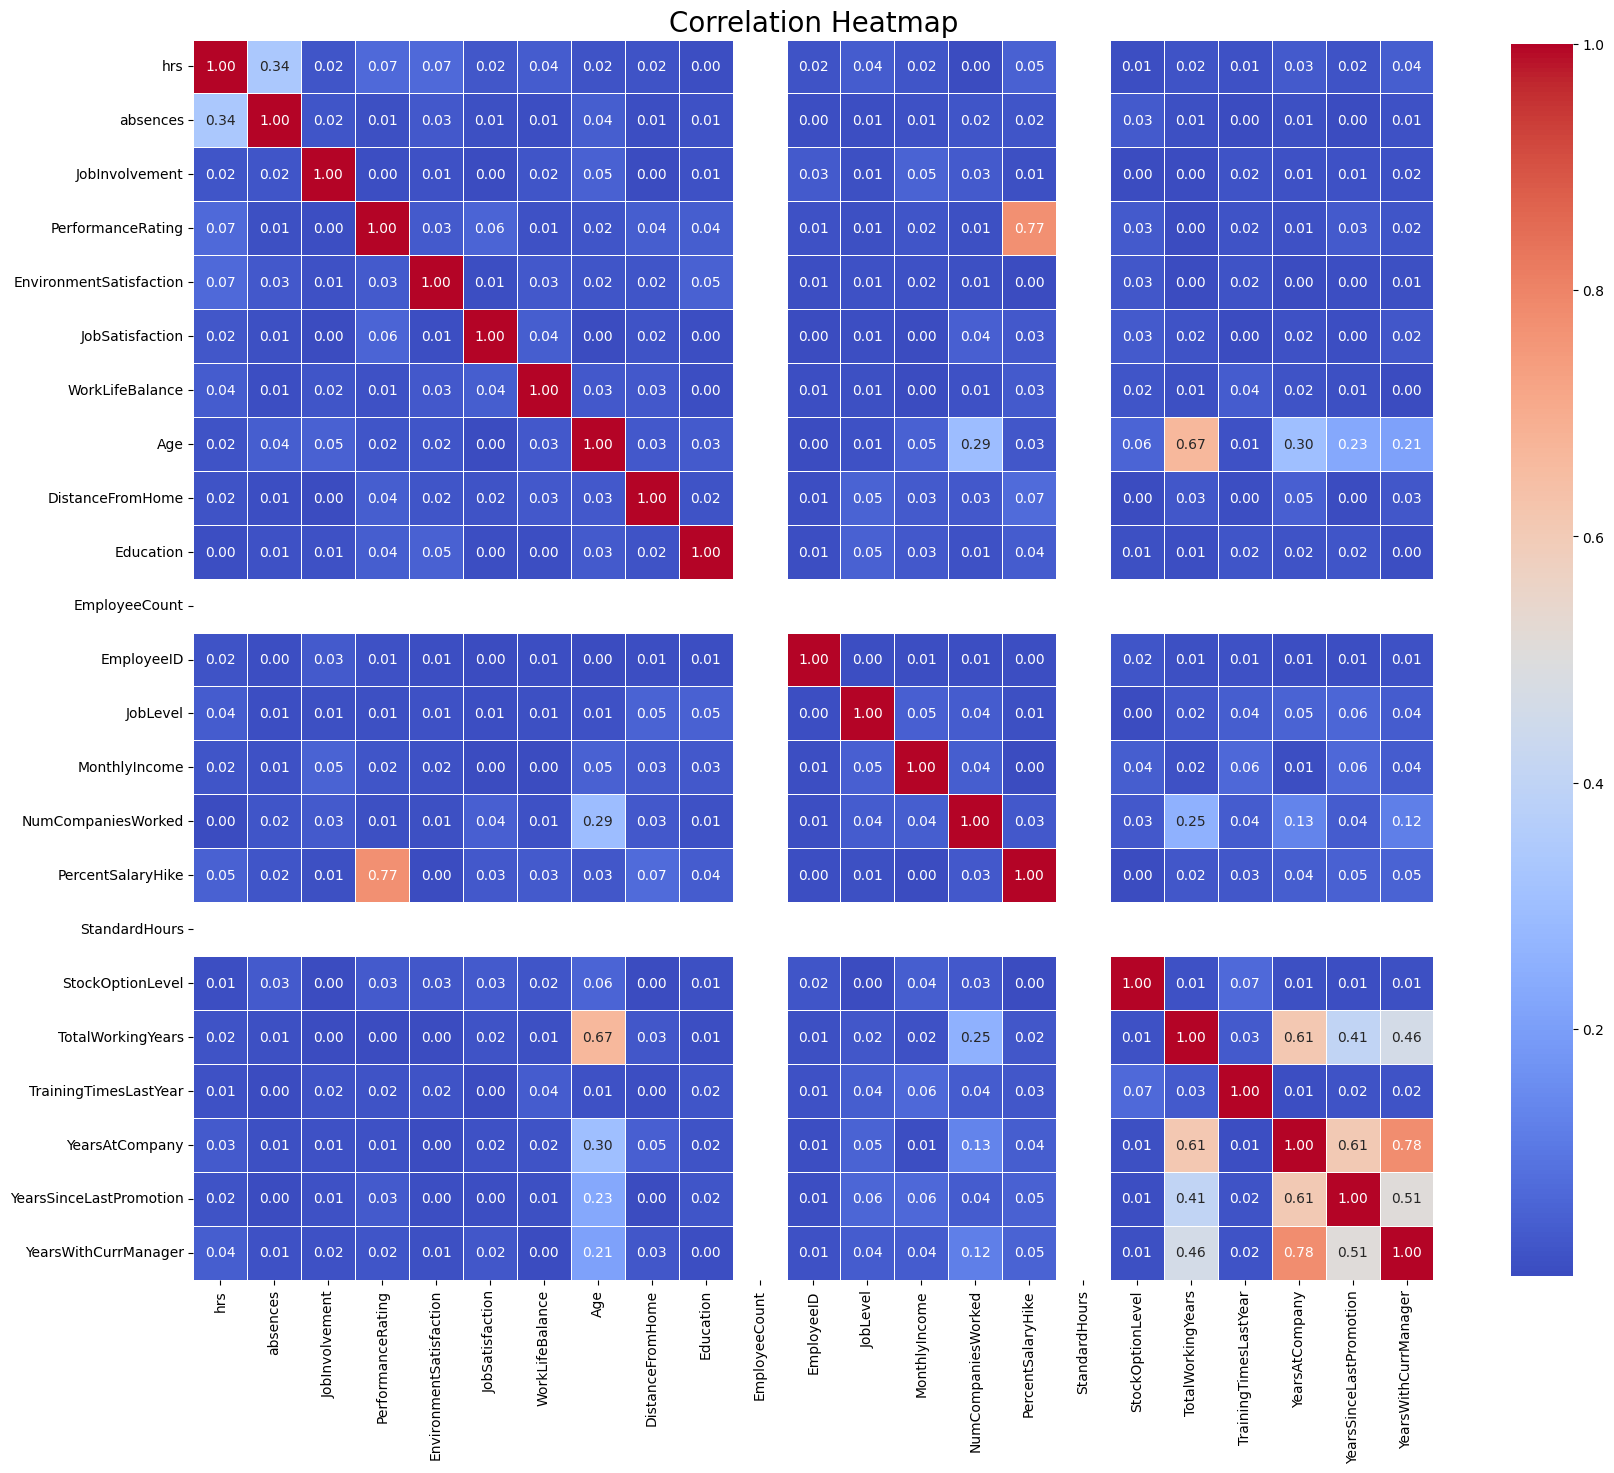

In [32]:
""" Seaborn correlation heatmap """

fig, ax = plt.subplots(figsize=(20, 20))

plt.title("Correlation Heatmap", fontsize=20)
sns.heatmap(
    correlation,
    square=True,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    ax=ax,
    cbar_kws={"shrink": 0.8},
)

## 3.5 Attributes

### 3.5.1. Divide Dataset into several subsets depending on the attribute type

During this section, we will divide the dataset into three subsets in order to separate the attributes with different data types. This will allow us to apply different preprocessing techniques to each subset.

In [33]:
# First of all, we divide our data-set into two general groups, categorical and numerical variables

X_train_str = X_train.select_dtypes(include=object)
X_train_num = X_train.select_dtypes(exclude=object)

In [34]:
# Next, we create a new subset of the ordinal variables
X_train_ordinals = X_train[['BusinessTravel']]
X_train_ordinals

,BusinessTravel
1,Travel_Frequently
6,Travel_Rarely
13,Non-Travel
28,Travel_Frequently
30,Travel_Rarely
...,...
4404,Travel_Rarely
4406,NaN
4407,Travel_Rarely
4408,Travel_Rarely


In [35]:
# Next, we take out the ordinal variables from the categorical variables group
X_train_not_ordinals = X_train_str.drop('BusinessTravel', axis=1)
print(X_train_not_ordinals.head)

<bound method NDFrame.head of                   Department EducationField  Gender                JobRole  \
1     Research & Development  Life Sciences  Female     Research Scientist   
6     Research & Development        Medical     NaN        Sales Executive   
13    Research & Development        Medical    Male     Research Scientist   
28    Research & Development        Medical    Male     Research Scientist   
30    Research & Development        Medical    Male     Research Scientist   
...                      ...            ...     ...                    ...   
4404                   Sales          Other  Female        Human Resources   
4406  Research & Development        Medical     NaN  Laboratory Technician   
4407  Research & Development  Life Sciences    Male        Sales Executive   
4408                   Sales        Medical    Male                    NaN   
4409  Research & Development        Medical    Male  Laboratory Technician   

     MaritalStatus Over18  
1    

### 3.5.2 Eliminate irrelevant attributes

In [36]:
X_train_num.columns

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
# We take out the EmproyeeID column from the numerical variables group since its an identifier 
X_train_num = X_train_num.drop('EmployeeID', axis=1)
X_train_num.columns

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
# We look for variables with only one value, in order to take them out
for i in X_train_not_ordinals.columns:
  print(X_train_str[i].unique())

['Research & Development' nan 'Human Resources' 'Sales']
['Life Sciences' 'Medical' 'Human Resources' 'Marketing'
 'Technical Degree' 'Other']
['Female' nan 'Male']
['Research Scientist' 'Sales Executive' 'Manager' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative'
 'Sales Representative' nan 'Research Director' 'Human Resources']
['Single' nan 'Married' 'Divorced']
['Y' nan]


In [41]:
print(X_train_num.columns)

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


We check if the assumptions made in previous sections about the attributes 'StandardHours' and 'EmployeeCount' are correct 

In [43]:
unique_vals = list(X_train_num['StandardHours'].unique())
print(unique_vals)


[nan, 8.0]


In [45]:
unique_vals = list(X_train_num['EmployeeCount'].unique())
print(unique_vals)

[1.0, nan]


As we can see, both the attributes we suspected have a constant value and are not useful for the analysis. We are going to conduct a quick overall analysis to ensure that we are not overlooking any other constant attributes.

In [44]:
for i in X_train_num.columns: 
  unique_vals = list(X_train_num[i].unique())
  print(i)
  print(unique_vals)

hrs
[7.315970548861944, 6.450876840696111, 8.8714212405175, 10.713065595716111, 9.662807898259445, nan, 6.177288041053056, 7.5880365908075, 9.67827867023639, 7.970253235162778, 9.749403168228334, 8.735999553770556, 8.600741856313888, 6.7463688085675, 7.89557675145, 6.134392012494167, 10.092957385095833, 5.656244979919444, 6.330712851405556, 7.429799196786944, 7.966945560017778, 6.032698572065834, 6.032679607318055, 8.933678045515277, 6.4357128514055555, 6.2227097278, 6.935332440874444, 8.247884872824445, 7.271326416778056, 8.106145693886388, 9.606076528335555, 9.325049085229722, 7.6582463186075, 7.590754127621389, 7.762304774654167, 5.832747657295833, 5.838710397143889, 7.388000892458611, 9.277542391789167, 10.289556001784723, 6.677385095939167, 7.7513821954483335, 9.487376171351945, 10.273971441320834, 9.333316599732223, 6.905394912985, 9.0162672913875, 7.825960508701389, 9.744162204372778, 9.914447791164445, 8.68441320838889, 8.047624944221111, 6.964200133868611, 6.193527443105555, 7

We drop constant attributes in the numerical subset: 'StandardHours' and 'EmployeeCount'

In [46]:
X_train_num = X_train_num.drop('StandardHours', axis=1 )
X_train_num.columns

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
X_train_num = X_train_num.drop('EmployeeCount', axis=1 )
X_train_num.columns

Since Over18 only has 1 value different than nan, we drop it from the dataset.

In [ ]:
X_train_not_ordinals = X_train_not_ordinals.drop ('Over18', axis=1 )
X_train_not_ordinals.columns

In [ ]:
# We check all the subsets we will be using 
print(X_train_not_ordinals.columns)
print(X_train_num.columns)
print(X_train_ordinals.columns)

---
# 4. Train-Test division 


**Note**: This division was already done before in *3.0. Dataset preparation*. We overwrite it to start from a clean state so there are no possible data contamination derived from the EDA process. Thus, no further explaination is needed.

<mark>En esta práctica la evaluación será más sencilla que en la primera. Simplemente 
dividiremos los datos en un conjunto de train para entrenar y ajustar hiper-
parámetros, y un conjunto de test en el que evaluaremos las distintas posibilidades 
que se probarán en la práctica. Hay que recordar que En problemas de clasificación 
desbalanceados hay que usar particiones estratificadas y métricas adecuadas 
(balanced_accuracy, f1, matriz de confusión). También es conveniente que los 
métodos de construcción de modelos traten el desbalanceo, usando por ejemplo 
el parámetro class_weight=”balanced”.</mark>

## 4.1. Stratified K-Fold Train-Test split
To ensure a fair and unbiased evaluation of our model's performance, we will be using stratified k-fold for dividing our data into training and test sets. Stratified k-fold is a commonly used technique in machine learning that ensures that the distribution of classes in the training and test sets is similar, thus reducing the risk of introducing bias into our model's performance evaluation.

By using stratified k-fold, we can ensure that each fold of the data used for training and testing our model contains a representative sample of all the classes in the dataset. This helps to account for any potential class imbalance in the data, ensuring that our model is trained and tested on a diverse set of data, leading to a more reliable evaluation of its performance.

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import StratifiedKFold

In [ ]:
""" Train Test Split using Stratified K-Fold """

# Make a copy of the data (we will re-split the data later to ensure that the data is not contaminated)
datos_copy = datos.copy()

# Define the number of folds for stratified k-fold
n_splits = 5

# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate over the stratified k-fold splits
for train_index, test_index in stratified_kfold.split(datos_copy, datos_copy['Attrition']):
    # Split the data into training and test sets using the current split indices
    train_set = datos_copy.iloc[train_index]
    test_set = datos_copy.iloc[test_index]
    
    # Extract the features (X) and target (y) from the training and test sets
    X_train = train_set.drop('Attrition', axis=1)  # Drop the 'Attrition' column to get the features
    y_train = train_set['Attrition']  # Extract the 'Attrition' column as the target
    
    X_test = test_set.drop('Attrition', axis=1)  # Drop the 'Attrition' column to get the features
    y_test = test_set['Attrition']  # Extract the 'Attrition' column as the target
 

In [ ]:
# Show the head of X_train, y_train, X_test, y_test
print("--------------------\n")
print(f"{X_train.head()}", f"{y_train.head()}", f"{X_test.head()}", f"{y_test.head()}", sep="\n--------------------\n")
print("--------------------\n")

print(f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}")

# Check is division summatory is correct
if X_train.shape[0] + X_test.shape[0] == datos_copy.shape[0]:
    print(
        f"\nThe train test division is correct: {X_train.shape[0]} + {X_test.shape[0]} = {datos_copy.shape[0]}"
    )
else:
    print("\nERROR: The train test division is incorrect")


--------------------

          hrs  absences  JobInvolvement  PerformanceRating  \
1    7.315971      13.0             2.0                4.0   
6    6.450877      17.0             NaN                4.0   
13   8.871421      14.0             2.0                3.0   
28  10.713066       6.0             2.0                3.0   
30   9.662808      11.0             2.0                3.0   

    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance   Age  \
1                       3.0              NaN              4.0  31.0   
6                       1.0              3.0              1.0  28.0   
13                      1.0              2.0              2.0   NaN   
28                      4.0              3.0              1.0  44.0   
30                      1.0              2.0              3.0  26.0   

       BusinessTravel              Department  ...  NumCompaniesWorked  \
1   Travel_Frequently  Research & Development  ...                 0.0   
6       Travel_Rarely  Researc

In [ ]:
# Check the train-test division correctness by comparing the class distribution in the original dataset and the train and test sets.
print("\n--------------------\n")
print("Original dataset class distribution:\n", datos_copy['Attrition'].value_counts(normalize=True))
print("\n--------------------\n")
print("Train set class distribution:\n", y_train.value_counts(normalize=True))
print("\n--------------------\n")
print("Test set class distribution:\n", y_test.value_counts(normalize=True))
print("\n--------------------\n")


--------------------

Original dataset class distribution:
 No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

--------------------

Train set class distribution:
 No     0.838719
Yes    0.161281
Name: Attrition, dtype: float64

--------------------

Test set class distribution:
 No     0.839002
Yes    0.160998
Name: Attrition, dtype: float64

--------------------



## 4.2. Train-Test Error metrics

For classification problems, the most common metrics used to evaluate the performance of a model are accuracy, precision, recall, and F1 score. However, these metrics are not always the best choice for evaluating the performance of a model, especially when the dataset is imbalanced.<br>In this case, we will be using the following metrics to evaluate the performance of our models: **balanced accuracy, F1 score, and confusion matrix**.

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix

np.random.seed(2)

def train_validation_test(model, estimators, X_train, y_train, folds_array, test = False, X_test = None, y_test = None):
    
    # ? For every model, we will obtain the balanced_accuracy, the f1_score and the confusion matrix
    
    # Train
    y_train_pred = estimators.predict(X_train)
    balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred, pos_label='Yes')
    cm_train = confusion_matrix(y_train, y_train_pred)
     

    # Test
    if test:
        y_test_pred = estimators.predict(X_test)
        balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, pos_label='Yes')
        cm_test = confusion_matrix(y_test, y_test_pred)
    
    # We retrain the model with the last obtained fold
    np.random.seed(2)
    
    X_train_fold, y_train_fold, X_validation_fold, y_validation_fold = folds_array[0], folds_array[2], folds_array[1], folds_array[3]

    model.fit(X = X_train_fold, y = y_train_fold)
    
    # Train in validation fold
    y_train_validation_pred = model.predict(X_train_fold)
    balanced_accuracy_train_validation = balanced_accuracy_score(y_train_fold, y_train_validation_pred)
    f1_train_validation = f1_score(y_train_fold, y_train_validation_pred, pos_label='Yes')
    cm_train_validation = confusion_matrix(y_train_fold, y_train_validation_pred)

    # Test in validation fold
    y_test_validation_pred = model.predict(X_validation_fold)
    balanced_accuracy_test_validation = balanced_accuracy_score(y_validation_fold, y_test_validation_pred)
    f1_test_validation = f1_score(y_validation_fold, y_test_validation_pred, pos_label='Yes')
    cm_test_validation = confusion_matrix(y_validation_fold, y_test_validation_pred)
    
    # ! Print results
    # Get the name of the model inside the estimators pipeline
    print("\n--------------------\n")
    print(f"MODEL: {model.best_estimator_.steps[-1][1]}")
    print(f"MODEL PARAMETERS: {model.best_params_}\n")
    # print(model)
    print("\n--------------------\n")

    print(f"TRAIN SET")
    print(f"Balanced accuracy in train set: {balanced_accuracy_train}")
    print(f"F1 score in train set: {f1_train}")
    print(f"Confusion matrix in train set:\n {cm_train}")
    print("\n--------------------\n")
    
    if test:
        print(f"TEST SET")
        print(f"Balanced accuracy in test set: {balanced_accuracy_test}")
        print(f"F1 score in test set: {f1_test}")
        print(f"Confusion matrix in test set:\n {cm_test}")
        print("\n--------------------\n")
    
    print(f"TRAIN VALIDATION SET")
    print(f"Balanced accuracy in train validation set: {balanced_accuracy_train_validation}")
    print(f"F1 score in train validation set: {f1_train_validation}")
    print(f"Confusion matrix in train validation set:\n {cm_train_validation}")
    print("\n--------------------\n")
    
    print(f"TEST VALIDATION SET")
    print(f"Balanced accuracy in test validation set: {balanced_accuracy_test_validation}")
    print(f"F1 score in test validation set: {f1_test_validation}")
    print(f"Confusion matrix in test validation set:\n {cm_test_validation}")
    print("\n--------------------\n")
    
    if test:
        return([[balanced_accuracy_train, f1_train, cm_train], [balanced_accuracy_train_validation, f1_train_validation, cm_train_validation], [balanced_accuracy_test_validation, f1_test_validation, cm_test_validation], [balanced_accuracy_test, f1_test, cm_test]])
    return([[balanced_accuracy_train, f1_train, cm_train], [balanced_accuracy_train_validation, f1_train_validation, cm_train_validation], [balanced_accuracy_test_validation, f1_test_validation, cm_test_validation]])
     

### 4.2.1. Print data distribution

In [ ]:
def print_data_distribution(folds_array):
    """Print the split of the last fold to check the correct distribution of the data"""
    print(
        "Train:",
        folds_array[0].shape,
        "Train-y:",
        folds_array[2].shape,
        "Validation:",
        folds_array[1].shape,
        "Validation-y:",
        folds_array[3].shape,
        sep=" | ",
    )

    # Print the distribution of the target variable in the train and validation sets
    print(
        f"\nTrain-y:\n{folds_array[2].value_counts(normalize=True)}",
        f"Validation-y:\n{folds_array[3].value_counts(normalize=True)}\n",
        sep="\n\n",
    )

---
# 5. Model construction

<mark>(1.3 puntos) Construcción de modelos: para esta práctica usaremos
LogisticRegression como método base (sin ajustar hiper-parámetros) y Boosting
como método avanzado (ajustando hiper-parámetros), a elegir. Es importante 
realizar los preprocesos que los datos necesiten, usando preferentemente 
pipelines. Como método de boosting, se puede elegir uno de entre los métodos de 
boosting disponibles en scikit-learn. Si además se usa uno de entre las librerías 
externas xgboost, lightgbm o catboost, se pueden sacar +0.35 puntos adicionale</mark>

<mark>(0.8 puntos) Usando algún método de selección de atributos de tipo filter
(SelectKBest) de entre los disponibles en sklearn (f_classif, 
mutual_info_classif o chi2), comprobad si se pueden mejorar los resultados del 
apartado anterior y extraer conclusiones sobre qué atributos son más importantes, 
al menos de acuerdo a estos métodos</mark>

In [ ]:
# Three dictionaries to store the results of the models
models, results, times = {}, {}, {}

## 5.0. Previous considerations

### 5.0.1. Categorical variables

For the **categorical variables**, we will use **one-hot encoding** to transform them into numerical attributes. One-hot encoding is a commonly used technique for converting categorical attributes into numerical attributes that can be used by a machine learning model. One-hot encoding creates a new binary attribute for each possible category of each categorical attribute. The value of the new binary attribute is 1 if the instance has that category, and 0 otherwise. This increases the complexity of the dataset, but it is necessary for the model to be able to interpret the categorical attributes in sklearn.

Additionaly, there is no need for scaling the data, as scales the features to have a mean of 0 and a standard deviation of 1, which is not applicable to categorical features that have been one-hot-encoded.

Note that we could also use label encoding to transform the categorical attributes into numerical attributes. However, one-hot encoding, is generally preferred over label encoding for categorical variables in machine learning because it avoids introducing false numerical relationships between categories.

#### 5.0.1.1. Nominal variables

As expected, we will use in the pipeline the **one-hot encoding** technique to transform the nominal variables into numerical attributes. Then we will use SimpleImputer to impute the missing values in the dataset, using the most frequent value for each attribute (as we are dealing with categorical attributes).

#### 5.0.1.1. Ordinal variables

As expected, we will use in the pipeline the **one-hot encoding** technique to transform the ordinal variables into numerical attributes. Then we will use SimpleImputer to impute the missing values in the dataset, using the most frequent value for each attribute (as we are dealing with categorical attributes).

We could use for categorical variables the **ordinal encoding** technique to transform the ordinal variables into numerical attributes. However, we will use one-hot encoding for all categorical variables for the sake of simplicity.

<mark>NOTA LO MISMO ES MEJOR USAR ORDINAL ENCODING</mark>

### 5.0.2. Numerical variables

For numerical attributes, we will use **IterativeImputer** to impute the missing values in the dataset. This imputer uses a machine learning model to estimate the missing values. It works by modeling each feature with missing values as a function of other features in a round-robin fashion.
The advantage is that it can **capture non-linear relationships** between features, and it is also able to impute missing values for multiple features simultaneously (which is not possible with SimpleImputer).
On the other hand, the disadvantage is that it is computationally expensive, but, as we are dealing with a relatively **small dataset**, this is not a problem.

Note that in sklearn, the IterativeImputer class is still experimental, so we will use the **IterativeImputer** class from the **sklearn.experimental** module.

Note also that the IterativeImputer in scikit-learn is designed to work with numerical data only. It uses a linear regression model to estimate missing values based on the other features in the dataset. Therefore, it is not appropriate to use IterativeImputer for imputing missing values in categorical data.

Additionally, we will use **StandardScaler** to scale the numerical attributes. This scaler standardizes features by removing the mean and scaling to unit variance. This is done to ensure that each attribute contributes approximately proportionately to the final distance. This is especially important for datasets with numerical attributes of different scales, as we have observed some of them in the EDA process.

### 5.0.3. Attribute selection

When selecting features for a machine learning model, there are several methods available to choose from. Three commonly used methods are f_classif, mutual_info_classif, and chi2. Each of these methods uses a different approach to select the most important features for the model.

The **f_classif** method is based on the ANOVA F-value and assumes that the features are normally distributed and there is a linear relationship between the features and the target variable. This means that it may not be the best choice for datasets that contain non-linear relationships between the features and the target variable. However, if the data does meet these assumptions, this method can be a reliable way to select the top k features with the highest scores.

On the other hand, the **mutual_info_classif** method estimates the mutual information between each feature and the target variable, which can capture non-linear relationships and does not assume any specific distribution for the features. This method is useful when the relationship between the features and the target variable is not linear or when the data contains non-normally distributed features.

Finally, the **chi2** method is suitable for datasets with categorical features and assumes that the features are independent of each other. This method computes the chi-squared statistic between each feature and the target variable, and selects the top k features with the highest scores. However, it may not be the best choice for datasets that contain continuous features or non-independent categorical features.

The mutual_info_classif method is a suitable choice for selecting features in a machine learning model when the relationships between the features and the target variable are non-linear or when the data contains non-normally distributed features. Unlike the f_classif method, it does not assume any specific distribution for the features and can capture non-linear relationships between the features and the target variable. Additionally, it can handle continuous as well as categorical features.

Therefore, if the dataset contains non-linear relationships or non-normally distributed features, the mutual_info_classif method may be a more appropriate choice than f_classif or chi2. Ultimately, the choice of method should be based on careful analysis and consideration of the specific dataset at hand.


### 5.0.4. Model validation split obtention
The validation split for the models was obtained using the 5th (last) fold of the StratifiedKFold cross-validation method. We chose the 5th fold arbitrarily, since the nature of StratifiedKFold ensures that all folds are representative of the data distribution.

In [ ]:
""" StratifieldKFold that stores the last split as the validation set """

# We could use whatever split due to the nature of StratifiedKFold, so the decision is arbitrary
def stratified_kfold_last_split(folds_array):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    for train_index, test_index in skf.split(X_train, y_train):
        # Note that the target variable is "Attrition"
        # Extract the features (X) and target (y) from the training and test sets
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    # Insert the folds in the array
    # This is possible because python passes data by reference so we do not need to return the array (not possible in cv)
    folds_array.append(X_train_fold); folds_array.append(X_val_fold); folds_array.append(y_train_fold); folds_array.append(y_val_fold)

## 5.1. Logistic Regression
Logistic regression with no hyperparameter tuning. It will be used as a baseline for the rest of the models.

In [ ]:
from sklearn.linear_model import LogisticRegression

import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

### 5.1.1. Logistic Regression - Predefined parameters

#### 5.1.1.1. Logistic Regression - Predefined parameters - No attribute selection

In [ ]:
""" Logistic Regression with the default parameters """

np.random.seed(2)

# ? Pipeline for numerical values (X_train_num)
imputer_num = IterativeImputer(
    random_state=2,
    missing_values=np.nan,
)
pipeline_lr_num = Pipeline(
    steps=[
        # ("imputer", SimpleImputer(missing_values=np.nan, strategy="median")), # ? Simple imputer with median
        ("imputer", imputer_num),
        ("scaler", StandardScaler()),
    ]
)

# ? One hot encoding the categorical variables
imputer_cat = SimpleImputer(strategy="most_frequent")
pipeline_lr_cat = Pipeline(
    steps=[
        ("imputer", imputer_cat),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        # ("selector", SelectPercentile(chi2, percentile=50)), # ? Feature selection with chi2
    ]
)

In [ ]:
""" Column transformer to apply the pipelines to the correct columns """

preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipeline_lr_num, X_train_num.columns), # X_train_num.columns for numerical values
        ("cat", pipeline_lr_cat, X_train_str.columns), # X_train_str.columns for categorical values
    ],
)

In [ ]:
""" Append classifier to preprocessing pipeline """

preprocessing_pipeline_lr = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(random_state=2, class_weight='balanced')),        
    ]
)

In [ ]:
""" Logistic Regression with the default parameters """

param_grid_lr = {
    "model__penalty": ["l2"],
    "model__C": [1.0],
    "model__fit_intercept": [True],
    "model__solver": ["lbfgs"],
    "model__max_iter": [100],
    "model__multi_class": ["auto"],
}

folds_array = []

model_lr = GridSearchCV(
    preprocessing_pipeline_lr,
    param_grid_lr,
    cv=stratified_kfold_last_split(folds_array),
    scoring="balanced_accuracy",
    n_jobs=-1,
)

start_time = time.time()
model_lr.fit(X_train, y_train)
end_time = time.time()

time_lr = end_time - start_time

# ! NS porq me da mejor simple imputer que el otro, pero vaya de 0.002 (0.6987387505335906 - 0.7005306394679833)

print_data_distribution(folds_array)

# Print the best model and its performance
print(
    "Logistic regression",
    # model_lr,
    model_lr.best_score_,
    # model_lr.best_params_,
    # time_lr,
)

score = train_validation_test(model_lr, model_lr.best_estimator_, X_train, y_train, folds_array) #, X_test, y_test, test=True)
print(f"TOTAL FIT TIME: {time_lr}")

models["Logistic_Regression_pred"] = model_lr
results["Logistic_Regression_pred"] = score
times["Logistic_Regression_pred"] = time_lr

# print_results("Logistic Regression", model_lr, model_lr.cv_results_["mean_test_score"], time_lr)

Train: | (2823, 30) | Train-y: | (2823,) | Validation: | (705, 30) | Validation-y: | (705,)

Train-y:
No     0.83847
Yes    0.16153
Name: Attrition, dtype: float64

Validation-y:
No     0.839716
Yes    0.160284
Name: Attrition, dtype: float64

Logistic regression 0.7111617024611399

--------------------

MODEL: LogisticRegression(class_weight='balanced', random_state=2)
MODEL PARAMETERS: {'model__C': 1.0, 'model__fit_intercept': True, 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=2)),
                                                                                         ('sca

#### 5.1.1.2. Logistic Regression - Predefined parameters - Attribute selection

<mark> SELECCIONAR 1 porq </mark>

In [ ]:
""" Logistic Regression with the default parameters """

np.random.seed(2)

# ? Pipeline for numerical values (X_train_num)
imputer_num = IterativeImputer(
    random_state=2,
    missing_values=np.nan,
)
pipeline_lr_num = Pipeline(
    steps=[
        ("imputer", imputer_num),
        ("scaler", StandardScaler()),
        ("selector", SelectKBest(mutual_info_classif)), # ? Feature selection with mutual_info_classif
        # ("selector2", SelectPercentile(mutual_info_classif, percentile=50)), # ? Feature selection with chi2
        # ("selector", SelectPercentile(chi2, percentile=50)), # ? Feature selection with chi2
    ]
)

# ? One hot encoding the categorical variables
imputer_cat = SimpleImputer(strategy="most_frequent")
pipeline_lr_cat = Pipeline(
    steps=[
        ("imputer", imputer_cat),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        # ("selector", SelectKBest(mutual_info_classif, k=10)), # ? Feature selection with mutual_info_classif
        # ("selector", SelectPercentile(chi2, percentile=50)), # ? Feature selection with chi2
        ("selector", SelectKBest(mutual_info_classif)), # ? Feature selection with mutual_info_classif
    ]
)

In [ ]:
""" Logistic Regression with the default parameters """
np.random.seed(2)

param_grid_lr = {
    "model__penalty": ["l2"],
    "model__C": [1.0],
    "model__fit_intercept": [True],
    "model__solver": ["lbfgs"],
    "model__max_iter": [100],
    "model__multi_class": ["auto"],
}

folds_array = []

model_lr = GridSearchCV(
    preprocessing_pipeline_lr,
    param_grid_lr,
    cv=stratified_kfold_last_split(folds_array),
    scoring="balanced_accuracy",
    n_jobs=-1,
)


start_time = time.time()
model_lr.fit(X_train, y_train)
end_time = time.time()

time_lr = end_time - start_time


print_data_distribution(folds_array)

# Print the best model and its performance
print(
    "Logistic regression",
    # model_lr,
    model_lr.best_score_,
    # model_lr.best_params_,
    # time_lr,
)

score = train_validation_test(model_lr, model_lr.best_estimator_, X_train, y_train, folds_array) #, X_test, y_test, test=True)
print(f"TOTAL FIT TIME: {time_lr}")

models["Logistic_Regression_pred_k"] = model_lr
results["Logistic_Regression_pred_k"] = score
times["Logistic_Regression_pred_k"] = time_lr

# print_results("Logistic Regression", model_lr, model_lr.cv_results_["mean_test_score"], time_lr)

Train: | (2823, 30) | Train-y: | (2823,) | Validation: | (705, 30) | Validation-y: | (705,)

Train-y:
No     0.83847
Yes    0.16153
Name: Attrition, dtype: float64

Validation-y:
No     0.839716
Yes    0.160284
Name: Attrition, dtype: float64

Logistic regression 0.7111617024611399

--------------------

MODEL: LogisticRegression(class_weight='balanced', random_state=2)
MODEL PARAMETERS: {'model__C': 1.0, 'model__fit_intercept': True, 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=2)),
                                                                                         ('sca

## 5.2. Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# ! TODO: se podria usar este: sklearn.ensemble.HistGradientBoostingClassifier

import time
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2

<mark>Como método de boosting, se puede elegir uno de entre los métodos de 
boosting disponibles en scikit-learn. Si además se usa uno de entre las librerías 
externas xgboost, lightgbm o catboost, se pueden sacar +0.35 puntos adicionales.</mark>

### 5.2.1. Boosting - Predefined parameters

#### 5.2.1.1. Boosting - Predefined parameters - No attribute selection

In [ ]:
""" Gradient Boosting Classifier with the default parameters """

np.random.seed(2)

# ? Pipeline for numerical values (X_train_num)
imputer_num = IterativeImputer(
    random_state=2,
    missing_values=np.nan,
)
pipeline_lr_num = Pipeline(
    steps=[
        # ("imputer", SimpleImputer(missing_values=np.nan, strategy="median")), # ? Simple imputer with median
        ("imputer", imputer_num),
        ("scaler", StandardScaler()),
    ]
)

# ? One hot encoding the categorical variables
imputer_cat = SimpleImputer(strategy="most_frequent")
pipeline_lr_cat = Pipeline(
    steps=[
        ("imputer", imputer_cat),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        # ("selector", SelectPercentile(chi2, percentile=50)), # ? Feature selection with chi2
    ]
)

In [ ]:
""" Column transformer to apply the pipelines to the correct columns """

preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipeline_lr_num, X_train_num.columns), # X_train_num.columns for numerical values
        ("cat", pipeline_lr_cat, X_train_str.columns), # X_train_str.columns for categorical values
    ],
)

In [ ]:
""" Append classifier to preprocessing pipeline """

preprocessing_pipeline_lr = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("model", GradientBoostingClassifier(random_state=2)),        
    ]
)

In [ ]:
""" Gradient boosting with the default parameters """

param_grid_lr = {
    "model__n_estimators": [100],
    "model__learning_rate": [0.1],
    "model__max_depth": [3],
    "model__subsample": [1.0],
    "model__min_samples_split": [2],
}

folds_array = []

model_lr = GridSearchCV(
    preprocessing_pipeline_lr,
    param_grid_lr,
    cv=stratified_kfold_last_split(folds_array),
    scoring="balanced_accuracy",
    n_jobs=-1,
)

start_time = time.time()
model_lr.fit(X_train, y_train)
end_time = time.time()

time_lr = end_time - start_time

# ! NS porq me da mejor simple imputer que el otro, pero vaya de 0.002 (0.6987387505335906 - 0.7005306394679833)

print_data_distribution(folds_array)

# Print the best model and its performance
print(
    "Logistic regression",
    # model_lr,
    model_lr.best_score_,
    # model_lr.best_params_,
    # time_lr,
)

score = train_validation_test(model_lr, model_lr.best_estimator_, X_train, y_train, folds_array) #, X_test, y_test, test=True)
print(f"TOTAL FIT TIME: {time_lr}")

models["Gradient_boosting_pred"] = model_lr
results["Gradient_boosting_pred"] = score
times["Gradient_boosting_pred"] = time_lr


# print_results("Logistic Regression", model_lr, model_lr.cv_results_["mean_test_score"], time_lr)

Train: | (2823, 30) | Train-y: | (2823,) | Validation: | (705, 30) | Validation-y: | (705,)

Train-y:
No     0.83847
Yes    0.16153
Name: Attrition, dtype: float64

Validation-y:
No     0.839716
Yes    0.160284
Name: Attrition, dtype: float64

Logistic regression 0.6608682870173197

--------------------

MODEL: GradientBoostingClassifier(random_state=2)
MODEL PARAMETERS: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_split': 2, 'model__n_estimators': 100, 'model__subsample': 1.0}


--------------------

TRAIN SET
Balanced accuracy in train set: 0.7274910003201338
F1 score in train set: 0.6206896551724138
Confusion matrix in train set:
 [[2948   11]
 [ 308  261]]

--------------------

TRAIN VALIDATION SET
Balanced accuracy in train validation set: 0.7386932159295577
F1 score in train validation set: 0.6395348837209303
Confusion matrix in train validation set:
 [[2355   12]
 [ 236  220]]

--------------------

TEST VALIDATION SET
Balanced accuracy in test valid

#### 5.2.1.2. Boosting - Predefined parameters - Attribute selection

In [ ]:
""" Gradient Boosting Classifier with the default parameters """

np.random.seed(2)

# ? Pipeline for numerical values (X_train_num)
imputer_num = IterativeImputer(
    random_state=2,
    missing_values=np.nan,
)
pipeline_lr_num = Pipeline(
    steps=[
        ("imputer", imputer_num),
        ("scaler", StandardScaler()),
        ("selector", SelectKBest(mutual_info_classif)), # ? Feature selection with mutual_info_classif
        # ("selector2", SelectPercentile(mutual_info_classif, percentile=50)), # ? Feature selection with chi2
        # ("selector", SelectPercentile(chi2, percentile=50)), # ? Feature selection with chi2
    ]
)

# ? One hot encoding the categorical variables
imputer_cat = SimpleImputer(strategy="most_frequent")
pipeline_lr_cat = Pipeline(
    steps=[
        ("imputer", imputer_cat),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        # ("selector", SelectKBest(mutual_info_classif, k=10)), # ? Feature selection with mutual_info_classif
        # ("selector", SelectPercentile(chi2, percentile=50)), # ? Feature selection with chi2
        ("selector", SelectKBest(mutual_info_classif)), # ? Feature selection with mutual_info_classif
    ]
)

In [ ]:
""" Gradient boosting with the default parameters """

param_grid_lr = {
    "model__n_estimators": [100],
    "model__learning_rate": [0.1],
    "model__max_depth": [3],
    "model__subsample": [1.0],
    "model__min_samples_split": [2],
}

folds_array = []

model_lr = GridSearchCV(
    preprocessing_pipeline_lr,
    param_grid_lr,
    cv=stratified_kfold_last_split(folds_array),
    scoring="balanced_accuracy",
    n_jobs=-1,
)

start_time = time.time()
model_lr.fit(X_train, y_train)
end_time = time.time()

time_lr = end_time - start_time

# ! NS porq me da mejor simple imputer que el otro, pero vaya de 0.002 (0.6987387505335906 - 0.7005306394679833)

print_data_distribution(folds_array)

# Print the best model and its performance
print(
    "Logistic regression",
    # model_lr,
    model_lr.best_score_,
    # model_lr.best_params_,
    # time_lr,
)

score = train_validation_test(model_lr, model_lr.best_estimator_, X_train, y_train, folds_array) #, X_test, y_test, test=True)
print(f"TOTAL FIT TIME: {time_lr}")

models["Gradient_boosting_pred_k"] = model_lr
results["Gradient_boosting_pred_k"] = score
times["Gradient_boosting_pred_k"] = time_lr

# print_results("Logistic Regression", model_lr, model_lr.cv_results_["mean_test_score"], time_lr)

Train: | (2823, 30) | Train-y: | (2823,) | Validation: | (705, 30) | Validation-y: | (705,)

Train-y:
No     0.83847
Yes    0.16153
Name: Attrition, dtype: float64

Validation-y:
No     0.839716
Yes    0.160284
Name: Attrition, dtype: float64

Logistic regression 0.6608682870173197

--------------------

MODEL: GradientBoostingClassifier(random_state=2)
MODEL PARAMETERS: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_split': 2, 'model__n_estimators': 100, 'model__subsample': 1.0}


--------------------

TRAIN SET
Balanced accuracy in train set: 0.7274910003201338
F1 score in train set: 0.6206896551724138
Confusion matrix in train set:
 [[2948   11]
 [ 308  261]]

--------------------

TRAIN VALIDATION SET
Balanced accuracy in train validation set: 0.7386932159295577
F1 score in train validation set: 0.6395348837209303
Confusion matrix in train validation set:
 [[2355   12]
 [ 236  220]]

--------------------

TEST VALIDATION SET
Balanced accuracy in test valid

### 5.2.2. Boosting - Selected parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#### 5.2.2.1. Boosting - Selected parameters - No attribute selection

In [ ]:
""" Gradient Boosting Classifier with the default parameters """

np.random.seed(2)

# ? Pipeline for numerical values (X_train_num)
imputer_num = IterativeImputer(
    random_state=2,
    missing_values=np.nan,
)
pipeline_lr_num = Pipeline(
    steps=[
        # ("imputer", SimpleImputer(missing_values=np.nan, strategy="median")), # ? Simple imputer with median
        ("imputer", imputer_num),
        ("scaler", StandardScaler()),
    ]
)

# ? One hot encoding the categorical variables
imputer_cat = SimpleImputer(strategy="most_frequent")
pipeline_lr_cat = Pipeline(
    steps=[
        ("imputer", imputer_cat),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        # ("selector", SelectPercentile(chi2, percentile=50)), # ? Feature selection with chi2
    ]
)

In [ ]:
""" Gradient boosting with the default parameters """

budget = 10

param_grid_lr = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.01, 0.1, 1.0],
    "model__max_depth": [2, 3, 4],
    "model__subsample": [0.5, 0.8, 1.0],
    "model__min_samples_split": [2, 5, 10],
}

folds_array = []

model_lr = RandomizedSearchCV(
    preprocessing_pipeline_lr,
    param_grid_lr,
    cv=stratified_kfold_last_split(folds_array),
    scoring="balanced_accuracy",
    n_iter=budget,
    n_jobs=-1,
)

start_time = time.time()
model_lr.fit(X_train, y_train)
end_time = time.time()

time_lr = end_time - start_time

# ! NS porq me da mejor simple imputer que el otro, pero vaya de 0.002 (0.6987387505335906 - 0.7005306394679833)

print_data_distribution(folds_array)

# Print the best model and its performance
print(
    "Logistic regression",
    # model_lr,
    model_lr.best_score_,
    # model_lr.best_params_,
    # time_lr,
)

score = train_validation_test(model_lr, model_lr.best_estimator_, X_train, y_train, folds_array) #, X_test, y_test, test=True)
print(f"TOTAL FIT TIME: {time_lr}")


models["Gradient_boosting_select"] = model_lr
results["Gradient_boosting_select"] = score
times["Gradient_boosting_select"] = time_lr

# print_results("Logistic Regression", model_lr, model_lr.cv_results_["mean_test_score"], time_lr)

Train: | (2823, 30) | Train-y: | (2823,) | Validation: | (705, 30) | Validation-y: | (705,)

Train-y:
No     0.83847
Yes    0.16153
Name: Attrition, dtype: float64

Validation-y:
No     0.839716
Yes    0.160284
Name: Attrition, dtype: float64

Logistic regression 0.7492709005679825

--------------------

MODEL: GradientBoostingClassifier(max_depth=4, min_samples_split=10, n_estimators=200,
                           random_state=2, subsample=0.8)
MODEL PARAMETERS: {'model__subsample': 0.8, 'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__max_depth': 4, 'model__learning_rate': 0.1}


--------------------

TRAIN SET
Balanced accuracy in train set: 0.9330471927116402
F1 score in train set: 0.9275634995296331
Confusion matrix in train set:
 [[2958    1]
 [  76  493]]

--------------------

TRAIN VALIDATION SET
Balanced accuracy in train validation set: 0.9616228070175439
F1 score in train validation set: 0.9600912200684151
Confusion matrix in train validation set:
 [[236

In [ ]:
balanced = []

balanced2 = []

balanced3 = []

balanced4 = []

balanced5 = []



a_n_estimators = [50, 100, 200]
a_learning_rate = [0.01, 0.1, 1.0]
a_max_depth = [2, 3, 4]
a_subsample = [0.5, 0.8, 1.0]
a_min_samples_split = [2, 5, 10]


for i in a_n_estimators:
    param_grid_lr = {
    "model__n_estimators": [i],
    "model__learning_rate": [0.1],
    "model__max_depth": [3],
    "model__subsample": [1.0],
    "model__min_samples_split": [2],
    }

    folds_array = []

    model_lr = GridSearchCV(
        preprocessing_pipeline_lr,
        param_grid_lr,
        cv=stratified_kfold_last_split(folds_array),
        scoring="balanced_accuracy",
        n_jobs=-1,
    )

    start_time = time.time()
    model_lr.fit(X_train, y_train)
    end_time = time.time()

    balanced.append( model_lr.best_score_)
    
for i in a_learning_rate:
    param_grid_lr = {
    "model__n_estimators": [100],
    "model__learning_rate": [i],
    "model__max_depth": [3],
    "model__subsample": [1.0],
    "model__min_samples_split": [2],
    }

    folds_array = []

    model_lr = GridSearchCV(
        preprocessing_pipeline_lr,
        param_grid_lr,
        cv=stratified_kfold_last_split(folds_array),
        scoring="balanced_accuracy",
        n_jobs=-1,
    )

    start_time = time.time()
    model_lr.fit(X_train, y_train)
    end_time = time.time()

    balanced2.append( model_lr.best_score_)
    
for i in a_max_depth:
    param_grid_lr = {
    "model__n_estimators": [100],
    "model__learning_rate": [0.1],
    "model__max_depth": [i],
    "model__subsample": [1.0],
    "model__min_samples_split": [2],
    }

    folds_array = []

    model_lr = GridSearchCV(
        preprocessing_pipeline_lr,
        param_grid_lr,
        cv=stratified_kfold_last_split(folds_array),
        scoring="balanced_accuracy",
        n_jobs=-1,
    )

    start_time = time.time()
    model_lr.fit(X_train, y_train)
    end_time = time.time()

    balanced3.append( model_lr.best_score_)


for i in a_subsample:
    param_grid_lr = {
    "model__n_estimators": [100],
    "model__learning_rate": [0.1],
    "model__max_depth": [3],
    "model__subsample": [i],
    "model__min_samples_split": [2],
    }

    folds_array = []

    model_lr = GridSearchCV(
        preprocessing_pipeline_lr,
        param_grid_lr,
        cv=stratified_kfold_last_split(folds_array),
        scoring="balanced_accuracy",
        n_jobs=-1,
    )

    start_time = time.time()
    model_lr.fit(X_train, y_train)
    end_time = time.time()

    balanced4.append( model_lr.best_score_)
    
for i in a_min_samples_split:
    param_grid_lr = {
    "model__n_estimators": [100],
    "model__learning_rate": [0.1],
    "model__max_depth": [3],
    "model__subsample": [1.0],
    "model__min_samples_split": [i],
    }

    folds_array = []

    model_lr = GridSearchCV(
        preprocessing_pipeline_lr,
        param_grid_lr,
        cv=stratified_kfold_last_split(folds_array),
        scoring="balanced_accuracy",
        n_jobs=-1,
    )

    start_time = time.time()
    model_lr.fit(X_train, y_train)
    end_time = time.time()

    balanced5.append( model_lr.best_score_)
# Crear dos subplots, uno para cada gráfico
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(8, 12))

# Graficar RMSE vs. n_neighbors en el primer subplot
ax1.plot(a_n_estimators, balanced, label="Balanced accuracy")
ax1.set_xlabel("n_estimators")
ax1.set_ylabel("Balanced accuracy")
ax1.set_title("Gráfica de Balanced")

# Graficar MAE vs. n_neighbors en el segundo subplot
ax2.plot(a_learning_rate,  balanced2, label="Balanced accuracy")
ax2.set_xlabel("learning_rate")
ax2.set_ylabel("Balanced accuracy")
ax2.set_title("Gráfica de Balanced accuracy")

# Graficar RMSE vs. metric en el tercer subplot
ax3.plot(a_max_depth,  balanced3, label="Balanced accuracy")
ax3.set_xlabel("max_depth")
ax3.set_ylabel("Balanced accuracy")
ax3.set_title("Gráfica de Balanced accuracy")

# Graficar MAE vs. metric en el cuarto subplot
ax4.plot(a_subsample ,  balanced4, label="Balanced accuracy")
ax4.set_xlabel("subsample")
ax4.set_ylabel("Balanced accuracy")
ax4.set_title("Gráfica de Balanced accuracy")

# Graficar RMSE vs. metric en el tercer subplot
ax5.plot(a_min_samples_split, balanced5, label="Balanced accuracy")
ax5.set_xlabel("min_samples_split")
ax5.set_ylabel("Balanced accuracy")
ax5.set_title("Gráfica de Balanced accuracy")


plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 3]
plt.show()

#### 5.2.2.2. Boosting - Selected parameters - Attribute selection

In [ ]:
""" Gradient Boosting Classifier with the default parameters """

np.random.seed(2)

# ? Pipeline for numerical values (X_train_num)
imputer_num = IterativeImputer(
    random_state=2,
    missing_values=np.nan,
)
pipeline_lr_num = Pipeline(
    steps=[
        ("imputer", imputer_num),
        ("scaler", StandardScaler()),
        ("selector", SelectKBest(mutual_info_classif)), # ? Feature selection with mutual_info_classif
        # ("selector2", SelectPercentile(mutual_info_classif, percentile=50)), # ? Feature selection with chi2
        # ("selector", SelectPercentile(chi2, percentile=50)), # ? Feature selection with chi2
    ]
)

# ? One hot encoding the categorical variables
imputer_cat = SimpleImputer(strategy="most_frequent")
pipeline_lr_cat = Pipeline(
    steps=[
        ("imputer", imputer_cat),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        # ("selector", SelectKBest(mutual_info_classif, k=10)), # ? Feature selection with mutual_info_classif
        # ("selector", SelectPercentile(chi2, percentile=50)), # ? Feature selection with chi2
        ("selector", SelectKBest(mutual_info_classif)), # ? Feature selection with mutual_info_classif
    ]
)

In [ ]:
""" Gradient boosting with the default parameters """

budget = 10

param_grid_lr = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.01, 0.1, 1.0],
    "model__max_depth": [2, 3, 4],
    "model__subsample": [0.5, 0.8, 1.0],
    "model__min_samples_split": [2, 5, 10],
}

folds_array = []

model_lr = RandomizedSearchCV(
    preprocessing_pipeline_lr,
    param_grid_lr,
    cv=stratified_kfold_last_split(folds_array),
    scoring="balanced_accuracy",
    n_iter=budget,
    n_jobs=-1,
)

start_time = time.time()
model_lr.fit(X_train, y_train)
end_time = time.time()

time_lr = end_time - start_time

# ! NS porq me da mejor simple imputer que el otro, pero vaya de 0.002 (0.6987387505335906 - 0.7005306394679833)

print_data_distribution(folds_array)

# Print the best model and its performance
print(
    "Logistic regression",
    # model_lr,
    model_lr.best_score_,
    # model_lr.best_params_,
    # time_lr,
)

score = train_validation_test(model_lr, model_lr.best_estimator_, X_train, y_train, folds_array) #, X_test, y_test, test=True)
print(f"TOTAL FIT TIME: {time_lr}")

models["Gradient_boosting_select_k"] = model_lr
results["Gradient_boosting_select_k"] = score
times["Gradient_boosting_select_k"] = time_lr


# print_results("Logistic Regression", model_lr, model_lr.cv_results_["mean_test_score"], time_lr)

Train: | (2823, 30) | Train-y: | (2823,) | Validation: | (705, 30) | Validation-y: | (705,)

Train-y:
No     0.83847
Yes    0.16153
Name: Attrition, dtype: float64

Validation-y:
No     0.839716
Yes    0.160284
Name: Attrition, dtype: float64

Logistic regression 0.7492709005679825

--------------------

MODEL: GradientBoostingClassifier(max_depth=4, min_samples_split=10, n_estimators=200,
                           random_state=2, subsample=0.8)
MODEL PARAMETERS: {'model__subsample': 0.8, 'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__max_depth': 4, 'model__learning_rate': 0.1}


--------------------

TRAIN SET
Balanced accuracy in train set: 0.9330471927116402
F1 score in train set: 0.9275634995296331
Confusion matrix in train set:
 [[2958    1]
 [  76  493]]

--------------------

TRAIN VALIDATION SET
Balanced accuracy in train validation set: 0.9616228070175439
F1 score in train validation set: 0.9600912200684151
Confusion matrix in train validation set:
 [[236

### 5.2.1. Boosting - Predefined parameters - LightGBM

#### 5.2.1.1. Boosting - Predefined parameters - No attribute selection

#### 5.2.1.2. Boosting - Predefined parameters - Attribute selection

### 5.2.2. Boosting - Selected parameters

#### 5.2.2.1. Boosting - Selected parameters - No attribute selection

#### 5.2.2.2. Boosting - Selected parameters - Attribute selection

<mark>Código en un notebook. Es necesario que a lo largo de la práctica se vayan extrayendo 
conclusiones, y al final de la práctica, hay que hacer un resumen de todos los resultados 
obtenidos, usando tablas y/o gráficos.
● El archivo conteniendo el mejor modelo obtenido (llamado «modelo_final.pkl»).</mark>

## 5.3. Conclusions

---
# 6. Model evaluation

## 8.1. Best Model Selection

### 8.1.1. Best Model Prediction - Test

## 8.2. Selected Model Training

### 8.2.1. Selected Model Prediction and Comparison

In [ ]:
plt.rcParams['figure.figsize'] = [10, 3.5]

print("MODEL SCORES (Balanced Accuracy Train)")
iter = 0
for key, value in results.items():
    print(value[0][0])
    plt.bar(key, abs(value[0][0]))
    print(f"{iter}. {key}: {abs(value[0][0])}")
    iter += 1
plt.title("Score")
plt.xlabel("Model")
plt.ylabel("Balanced Accuracy Train")
plt.tight_layout()

plt.xticks(rotation=45, ha='right', size=7)

# Exporting image as png to ../data/img folder
plt.savefig("./best_methods_score.png")
plt.show()

print("MODEL SCORES (F1 Train)")
iter = 0
for key, value in results.items():
    print(value[0][1])
    plt.bar(key, abs(value[0][1]))
    print(f"{iter}. {key}: {abs(value[0][1])}")
    iter += 1
plt.title("Score")
plt.xlabel("Model")
plt.ylabel("F1 Train")
plt.tight_layout()

plt.xticks(rotation=45, ha='right', size=7)

# Exporting image as png to ../data/img folder
plt.savefig("./best_methods_score2.png")
plt.show()

'''print("MODEL SCORES (CM Train)")
iter = 0
for key, value in results.items():
    print(value[0][2])
    plt.bar(key, abs(value[0][2]))
    print(f"{iter}. {key}: {abs(value[0][2])}")
    iter += 1
plt.title("Score")
plt.xlabel("Model")
plt.ylabel("CM Train")
plt.tight_layout()

plt.xticks(rotation=45, ha='right', size=7)

# Exporting image as png to ../data/img folder
plt.savefig("./best_methods_score3.png")
plt.show()
'''
#---------------------------------------------------------------

print("MODEL SCORES (Balanced Accuracy Train Validation)")
iter = 0
for key, value in results.items():
    print(value[1][0])
    plt.bar(key, abs(value[1][0]))
    print(f"{iter}. {key}: {abs(value[1][0])}")
    iter += 1
plt.title("Score")
plt.xlabel("Model")
plt.ylabel("Balanced Accuracy Train Validation")
plt.tight_layout()

plt.xticks(rotation=45, ha='right', size=7)

# Exporting image as png to ../data/img folder
plt.savefig("./best_methods_score4.png")
plt.show()


print("MODEL SCORES (F1 Train Validation)")
iter = 0
for key, value in results.items():
    print(value[1][1])
    plt.bar(key, abs(value[1][1]))
    print(f"{iter}. {key}: {abs(value[1][1])}")
    iter += 1
plt.title("Score")
plt.xlabel("Model")
plt.ylabel("F1 Train Validation")
plt.tight_layout()

plt.xticks(rotation=45, ha='right', size=7)

# Exporting image as png to ../data/img folder
plt.savefig("./best_methods_score5.png")
plt.show()

'''print("MODEL SCORES (CM Train Validation)")
iter = 0
for key, value in results.items():
    print(value[1][2])
    plt.bar(key, abs(value[1][2]))
    print(f"{iter}. {key}: {abs(value[1][2])}")
    iter += 1
plt.title("Score")
plt.xlabel("Model")
plt.ylabel("CM Train Validation")
plt.tight_layout()

plt.xticks(rotation=45, ha='right', size=7)

# Exporting image as png to ../data/img folder
plt.savefig("./best_methods_score6.png")
plt.show()'''

#----------------------------------------------------------------

print("MODEL SCORES (Balanced Accuracy Test Validation)")
iter = 0
for key, value in results.items():
    print(value[2][0])
    plt.bar(key, abs(value[2][0]))
    print(f"{iter}. {key}: {abs(value[2][0])}")
    iter += 1
plt.title("Score")
plt.xlabel("Model")
plt.ylabel("Balanced Accuracy Test Validation")
plt.tight_layout()

plt.xticks(rotation=45, ha='right', size=7)

# Exporting image as png to ../data/img folder
plt.savefig("./best_methods_score7.png")
plt.show()


print("MODEL SCORES (F1 Test Validation)")
iter = 0
for key, value in results.items():
    print(value[2][1])
    plt.bar(key, abs(value[2][1]))
    print(f"{iter}. {key}: {abs(value[2][1])}")
    iter += 1
plt.title("Score")
plt.xlabel("Model")
plt.ylabel("F1 Test Validation")
plt.tight_layout()

plt.xticks(rotation=45, ha='right', size=7)

# Exporting image as png to ../data/img folder
plt.savefig("./best_methods_score7.png")
plt.show()

'''print("MODEL SCORES (CM Test Validation)")
iter = 0
for key, value in results.items():
    print(value[2][2])
    plt.bar(key, abs(value[2][2]))
    print(f"{iter}. {key}: {abs(value[2][2])}")
    iter += 1
plt.title("Score")
plt.xlabel("Model")
plt.ylabel("CM Test Validation")
plt.tight_layout()

plt.xticks(rotation=45, ha='right', size=7)

# Exporting image as png to ../data/img folder
plt.savefig("./best_methods_score7.png")
plt.show()
'''

## 8.3. Selected Model Export

---
# 9. Final Conclusions

During this project, we have had the opportunity to gain a deeper understanding of the model selection process. We began with exploratory data analysis (EDA), which helped us to improve our understanding and management of the data. We found this to be an extremely useful tool throughout the entire project. We believe that this part of the project should be evaluated with greater emphasis, as it is the foundation upon which all of our decisions were based.

Next, we created and trained all of our models, gaining experience in the use of pipelines and a deeper understanding of the importance of hyperparameters. Finally, we analyzed the different results provided by each model, gaining a better understanding of their respective advantages and disadvantages in terms of scoring and time.

We believe that this project is an excellent complement to the main lessons, as it provides a deeper understanding of the subject matter.

---
# X. Output the Jupyter Notebook as an HTML file

In [ ]:
import os

# Export the notebook to HTML
os.system("jupyter nbconvert --to html model.ipynb --output ../data/html/model.html")
print("Notebook exported to HTML")


[NbConvertApp] Converting notebook model.ipynb to html


Notebook exported to HTML


[NbConvertApp] Writing 2781816 bytes to ../data/html/model.html
